# Обработка данных

### Импорт данных

In [159]:
!pip install mplfinance

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\79636\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [160]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import matplotlib.ticker as ticker
import mplfinance as mpf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf


In [161]:
with open(r'D:\учусь\ЭАД\3 курс\курсач\дата\latest.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

df_prices = pd.DataFrame(data)
df_prices.head()

,i,c,a,b,p,o,h,l,v,q,s,t,st
0,2630,SNXBNB,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,1746337339,public
1,9198124,d00119bd-8c59-49ce-b9b1-ec971e178353,0.000076,0.000016,0.000042,NaN,0.000042,0.000042,0,0.000000,78.802632,1746337520,public
2,529,LAETH,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0,0.000000,1.960784,1746337339,public
3,423596,WQT_USDT,0.000032,0.000031,0.000031,0.000034,0.000035,0.000031,319809222,10281.456666,1.733375,1746337337,public
4,1676204,LGC_USDT,0.000020,0.000019,0.000020,0.000021,0.000021,0.000020,1074114,21.191485,3.251626,1740454538,public


In [162]:
df_markets = pd.read_csv(r'D:\учусь\ЭАД\3 курс\курсач\дата\markets.csv')
df_exchanges = pd.read_csv(r'D:\учусь\ЭАД\3 курс\курсач\дата\exchanges.csv')
df_database = pd.read_csv(r'D:\учусь\ЭАД\3 курс\курсач\дата\database.csv')


df_markets.head()


,id,symbol,exchange_id,lot_size
0,2,XCHBTC,1,0
1,6,DARBTC,1,0
2,8,SOLHIT,1,0
3,9,ACHBTC,1,0
4,10,DODOBTC,1,0


In [163]:
df_exchanges = df_exchanges[df_exchanges['cmc_id'].between(1, 99999)]
df_exchanges.head()

,id,name,cmc_id,site
0,1,XGo,42,https://xgo.com/
1,2,bithumb,489,https://bithumb.com/
2,5,Huobi Global,102,https://huobi.com/
3,6,Binance,270,https://binance.com/
4,8,Bitfinex,37,https://bitfinex.com


In [164]:
df_database.columns

Index(['mrkt_id', 'mrkt_code', 'mrkt_status', 'lot_size', 'created_at',
       'updated_at', 'exchange_id', 'exchange', 'inst_id', 'inst_code',
       'inst_status', 'base_id', 'base', 'base_code', 'base_status',
       'base_cmc_id', 'quote_id', 'quote', 'quote_code', 'quote_status',
       'quote_cmc_id'],
      dtype='object')

In [165]:
df_database['created_at'].min()

'2022-01-17T18:45:12Z'

In [166]:
df_database['created_at'].max()

'2025-05-15T12:02:09Z'

In [167]:
print("df_prices.shape:", df_prices.shape)
print("df_markets.shape:", df_markets.shape)
print("df_exchanges.shape:", df_exchanges.shape)
print("df_database.shape:", df_database.shape)

df_prices.shape: (28235, 13)
df_markets.shape: (28235, 4)
df_exchanges.shape: (30, 4)
df_database.shape: (28544, 21)


In [168]:
df_prices

,i,c,a,b,p,o,h,l,v,q,s,t,st
0,2630,SNXBNB,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000e+00,0.000000,1746337339,public
1,9198124,d00119bd-8c59-49ce-b9b1-ec971e178353,0.000076,0.000016,0.000042,NaN,0.000042,0.000042,0,0.000000e+00,78.802632,1746337520,public
2,529,LAETH,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0,0.000000e+00,1.960784,1746337339,public
3,423596,WQT_USDT,0.000032,0.000031,0.000031,0.000034,0.000035,0.000031,319809222,1.028146e+04,1.733375,1746337337,public
4,1676204,LGC_USDT,0.000020,0.000019,0.000020,0.000021,0.000021,0.000020,1074114,2.119149e+01,3.251626,1740454538,public
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28230,2774,SUSHIUSDT,0.625000,0.624000,0.624000,0.667000,0.667000,0.619000,3312875.6,2.130179e+06,0.160000,1746337697,public
28231,4992755,BAL_USDT,1.457000,0.763000,1.598000,1.598000,1.598000,1.598000,0,0.000000e+00,47.632121,1746337702,public
28232,9485081,LVVA-USDT,0.004059,0.004021,0.004036,0.004102,0.004074,0.003910,12876053,5.140267e+04,0.936191,1746337682,public
28233,7477,GFI_ETH,0.000477,0.000476,0.000475,0.000490,0.000492,0.000446,11617.42,5.350526e+00,0.230705,1746337530,public


In [169]:
df_database.head()

,mrkt_id,mrkt_code,mrkt_status,lot_size,created_at,updated_at,exchange_id,exchange,inst_id,inst_code,...,base_id,base,base_code,base_status,base_cmc_id,quote_id,quote,quote_code,quote_status,quote_cmc_id
0,2,XCHBTC,Default,1,2022-01-17T18:45:12Z,2023-01-23T11:59:49Z,1,XGo,2,XCHBTC,...,4643.0,Chia,XCH,Default,9258.0,1.0,Bitcoin,BTC,Default,1.0
1,6,DARBTC,Stale,1,2022-01-17T18:45:12Z,2025-01-04T14:04:21Z,1,XGo,6,DARBTC,...,986.0,Mines of Dalarnia,DAR,Default,11374.0,1.0,Bitcoin,BTC,Default,1.0
2,8,SOLHIT,Default,1,2022-01-17T18:45:12Z,2023-01-23T11:59:49Z,1,XGo,8,SOLHIT,...,4628.0,Solana,SOL,Default,5426.0,8117.0,HitBTC Token,HIT,Default,10506.0
3,9,ACHBTC,Default,1,2022-01-17T18:45:12Z,2023-01-23T11:59:49Z,1,XGo,9,ACHBTC,...,3682.0,Alchemy Pay,ACH,Default,6958.0,1.0,Bitcoin,BTC,Default,1.0
4,10,DODOBTC,Default,1,2022-01-17T18:45:12Z,2023-01-23T11:59:49Z,1,XGo,10,DODOBTC,...,4645.0,DODO,DODO,Default,7224.0,1.0,Bitcoin,BTC,Default,1.0


In [170]:
df_prices = df_prices[['i', 'c', 'p', 'v', 'q']]
df_prices = df_prices.rename(columns={'i': 'id_market'})

### Удаление нерелевантных значений

In [171]:
df_database = df_database[
    (
        (df_database['base_cmc_id'].between(1, 99998)) | (df_database['base_cmc_id'] == 1000000)
    ) & (
        (df_database['quote_cmc_id'].between(1, 99998)) | (df_database['quote_cmc_id'] == 1000000)
    )
]
print("df.shape:", df_database.shape)


df.shape: (22963, 21)


In [172]:
df_database = df_database.drop(columns=['mrkt_status', 'lot_size', 'created_at',
       'updated_at', 'inst_id', 'inst_code', 'base', 'quote', 'base_status', 'quote_status',
       'inst_status', 'base_cmc_id', 'quote_cmc_id'])
print("df.shape:", df_database.shape)


df.shape: (22963, 8)


### Анализ данных и визуальное представление

In [173]:
df_database

,mrkt_id,mrkt_code,exchange_id,exchange,base_id,base_code,quote_id,quote_code
0,2,XCHBTC,1,XGo,4643.0,XCH,1.0,BTC
1,6,DARBTC,1,XGo,986.0,DAR,1.0,BTC
2,8,SOLHIT,1,XGo,4628.0,SOL,8117.0,HIT
3,9,ACHBTC,1,XGo,3682.0,ACH,1.0,BTC
4,10,DODOBTC,1,XGo,4645.0,DODO,1.0,BTC
...,...,...,...,...,...,...,...,...
28537,9582931,SWCH_USDT,24,Poloniex,261434.0,SWCH,15.0,USDT
28538,9582934,unicorn_usdt,57,XT.com,6657.0,UNICORN,15.0,USDT
28539,9582960,UNICORN_USDT,134,BitMart,6657.0,UNICORN,15.0,USDT
28540,9582978,AUSDUSDC,355,Bullish,1421050.0,AUSD,2175.0,USDC


### Формирование списка валют и подсчет числа бирж

In [174]:
base_codes = df_database['base_code'].unique()
quote_codes = df_database['quote_code'].unique()

# Список криптовалют
cryptocurrency_names = list(set(base_codes) | set(quote_codes))
len(cryptocurrency_names)

6374

In [175]:
exchange_counts = {}
for currency in cryptocurrency_names:
    # Фильтруем строки, где валюта встречается в ЛЮБОЙ колонке (base или quote)
    mask = (df_database['base_code'] == currency) | (df_database['quote_code'] == currency)
    # Считаем УНИКАЛЬНЫЕ exchange_id в отфильтрованных строках
    exchange_counts[currency] = df_database.loc[mask, 'exchange_id'].nunique()

counts_df = (
    pd.DataFrame.from_dict(exchange_counts, orient='index', columns=['num_exchanges'])
    .sort_values('num_exchanges', ascending=False)
    .reset_index()
    .rename(columns={'index': 'currency_name'})
)
counts_df.shape

(6374, 2)

In [176]:
counts_df_reliable = counts_df[counts_df['num_exchanges'] > 1]
reliable_cryptocurrencies = counts_df_reliable['currency_name'].tolist()
len(reliable_cryptocurrencies)

3074

### Формирование единой базы данных

In [177]:
merged_df = pd.merge(
    df_prices,               
    df_database,           
    left_on='id_market', 
    right_on='mrkt_id',
    how='inner'     
)
merged_df

,id_market,c,p,v,q,mrkt_id,mrkt_code,exchange_id,exchange,base_id,base_code,quote_id,quote_code
0,2630,SNXBNB,0.000000,0,0.000000e+00,2630,SNXBNB,6,Binance,2457.0,SNX,20.0,BNB
1,9198124,d00119bd-8c59-49ce-b9b1-ec971e178353,0.000042,0,0.000000e+00,9198124,d00119bd-8c59-49ce-b9b1-ec971e178353,60,Latoken,396164.0,CTEX,15.0,USDT
2,529,LAETH,0.000001,0,0.000000e+00,529,LAETH,1,XGo,374.0,LA,2.0,ETH
3,423596,WQT_USDT,0.000031,319809222,1.028146e+04,423596,WQT_USDT,134,BitMart,7825.0,WQT,15.0,USDT
4,1676204,LGC_USDT,0.000020,1074114,2.119149e+01,1676204,LGC_USDT,134,BitMart,22066.0,LGC,15.0,USDT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22740,2774,SUSHIUSDT,0.624000,3312875.6,2.130179e+06,2774,SUSHIUSDT,6,Binance,4611.0,SUSHI,15.0,USDT
22741,4992755,BAL_USDT,1.598000,0,0.000000e+00,4992755,BAL_USDT,24,Poloniex,4619.0,BAL,15.0,USDT
22742,9485081,LVVA-USDT,0.004036,12876053,5.140267e+04,9485081,LVVA-USDT,48,Kucoin,1492788.0,LVVA,15.0,USDT
22743,7477,GFI_ETH,0.000475,11617.42,5.350526e+00,7477,GFI_ETH,36,Gate.io,8468.0,GFI,2.0,ETH


In [178]:
merged_df = merged_df.drop(columns=['mrkt_id', 'c', 'mrkt_code'])
merged_df = merged_df.dropna(subset=['base_code', 'quote_code'])
merged_df

,id_market,p,v,q,exchange_id,exchange,base_id,base_code,quote_id,quote_code
0,2630,0.000000,0,0.000000e+00,6,Binance,2457.0,SNX,20.0,BNB
1,9198124,0.000042,0,0.000000e+00,60,Latoken,396164.0,CTEX,15.0,USDT
2,529,0.000001,0,0.000000e+00,1,XGo,374.0,LA,2.0,ETH
3,423596,0.000031,319809222,1.028146e+04,134,BitMart,7825.0,WQT,15.0,USDT
4,1676204,0.000020,1074114,2.119149e+01,134,BitMart,22066.0,LGC,15.0,USDT
...,...,...,...,...,...,...,...,...,...,...
22740,2774,0.624000,3312875.6,2.130179e+06,6,Binance,4611.0,SUSHI,15.0,USDT
22741,4992755,1.598000,0,0.000000e+00,24,Poloniex,4619.0,BAL,15.0,USDT
22742,9485081,0.004036,12876053,5.140267e+04,48,Kucoin,1492788.0,LVVA,15.0,USDT
22743,7477,0.000475,11617.42,5.350526e+00,36,Gate.io,8468.0,GFI,2.0,ETH


In [179]:
# Оставляем только строки, где base И quote есть в reliable_cryptocurrencies
df_filtered = merged_df[
    merged_df['base_code'].isin(reliable_cryptocurrencies) & 
    merged_df['quote_code'].isin(reliable_cryptocurrencies)
]

In [181]:
mask = (df_filtered['p'] > 0) & (df_filtered['q'] > 0)
df_filtered = df_filtered[mask]
df_filtered

,id_market,p,v,q,exchange_id,exchange,base_id,base_code,quote_id,quote_code
3,423596,0.000031,319809222,1.028146e+04,134,BitMart,7825.0,WQT,15.0,USDT
4,1676204,0.000020,1074114,2.119149e+01,134,BitMart,22066.0,LGC,15.0,USDT
5,7612,0.000143,128664514,1.813956e+04,36,Gate.io,3975.0,BCX,15.0,USDT
6,7579169,0.022120,1183562,2.627499e+04,57,XT.com,943435.0,KFC,15.0,USDT
7,9309090,0.039580,42521875.38,1.778390e+06,36,Gate.io,1343745.0,MOODENG,15.0,USDT
...,...,...,...,...,...,...,...,...,...,...
22738,4992961,0.003000,4452.538,1.338093e+01,24,Poloniex,5295.0,SAMO,15.0,USDT
22739,6471644,0.000036,1333620087.1677,4.899349e+04,48,Kucoin,643592.0,WEN,15.0,USDT
22740,2774,0.624000,3312875.6,2.130179e+06,6,Binance,4611.0,SUSHI,15.0,USDT
22742,9485081,0.004036,12876053,5.140267e+04,48,Kucoin,1492788.0,LVVA,15.0,USDT


### Распределение данных

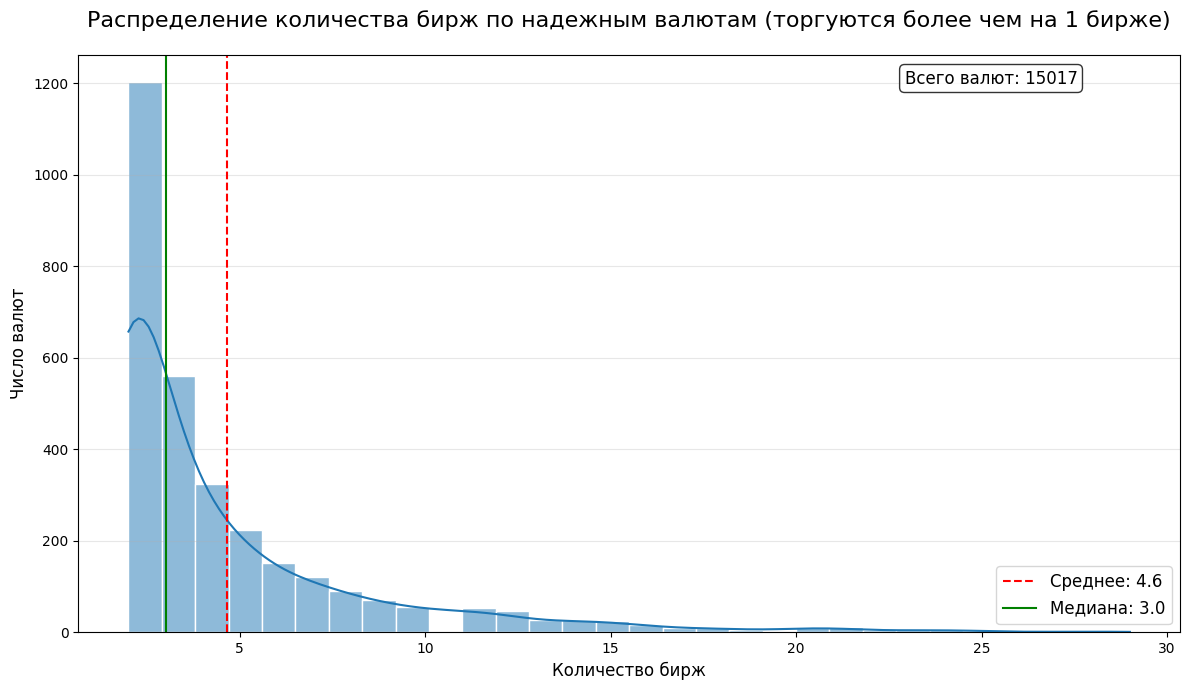

In [183]:
plt.figure(figsize=(12, 7))

ax = sns.histplot(data=counts_df_reliable, 
                 bins=30, 
                 kde=True,
                 color='royalblue',
                 edgecolor='white')

mean_val = counts_df_reliable['num_exchanges'].mean()
median_val = counts_df_reliable['num_exchanges'].median()
ax.axvline(mean_val, color='red', linestyle='--', label=f'Среднее: {mean_val:.1f}')
ax.axvline(median_val, color='green', linestyle='-', label=f'Медиана: {median_val:.1f}')

plt.title('Распределение количества бирж по надежным валютам (торгуются более чем на 1 бирже)', fontsize=16, pad=20)
plt.xlabel('Количество бирж', fontsize=12)
plt.ylabel('Число валют', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.legend(fontsize=12)

total_currencies = len(df_filtered)
plt.annotate(f'Всего валют: {total_currencies}', 
             xy=(0.75, 0.95),
             xycoords='axes fraction',
             fontsize=12,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

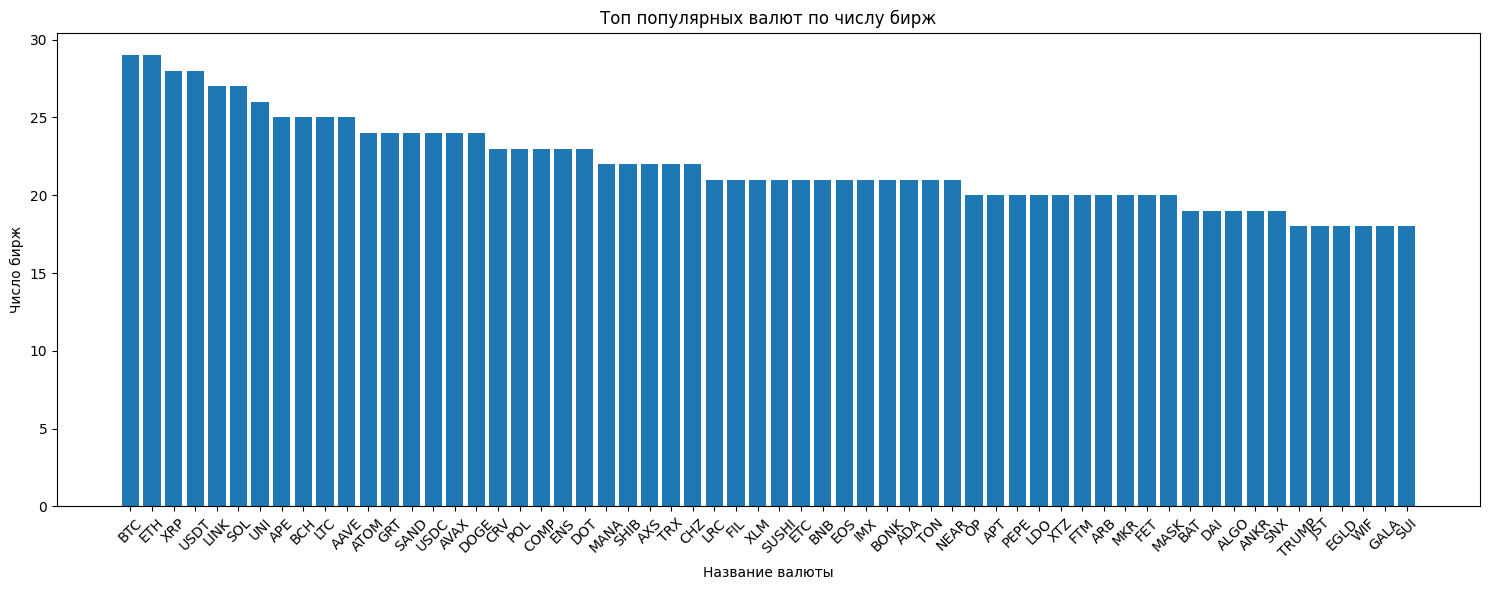

In [184]:
top_100 = counts_df_reliable.sort_values('num_exchanges', ascending=False).head(60)
plt.figure(figsize=(15, 6))
bars = plt.bar(top_100['currency_name'], top_100['num_exchanges'])
plt.title('Топ популярных валют по числу бирж')
plt.xlabel('Название валюты')
plt.ylabel('Число бирж')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [185]:
top_exchanges = df_filtered['exchange'].value_counts()

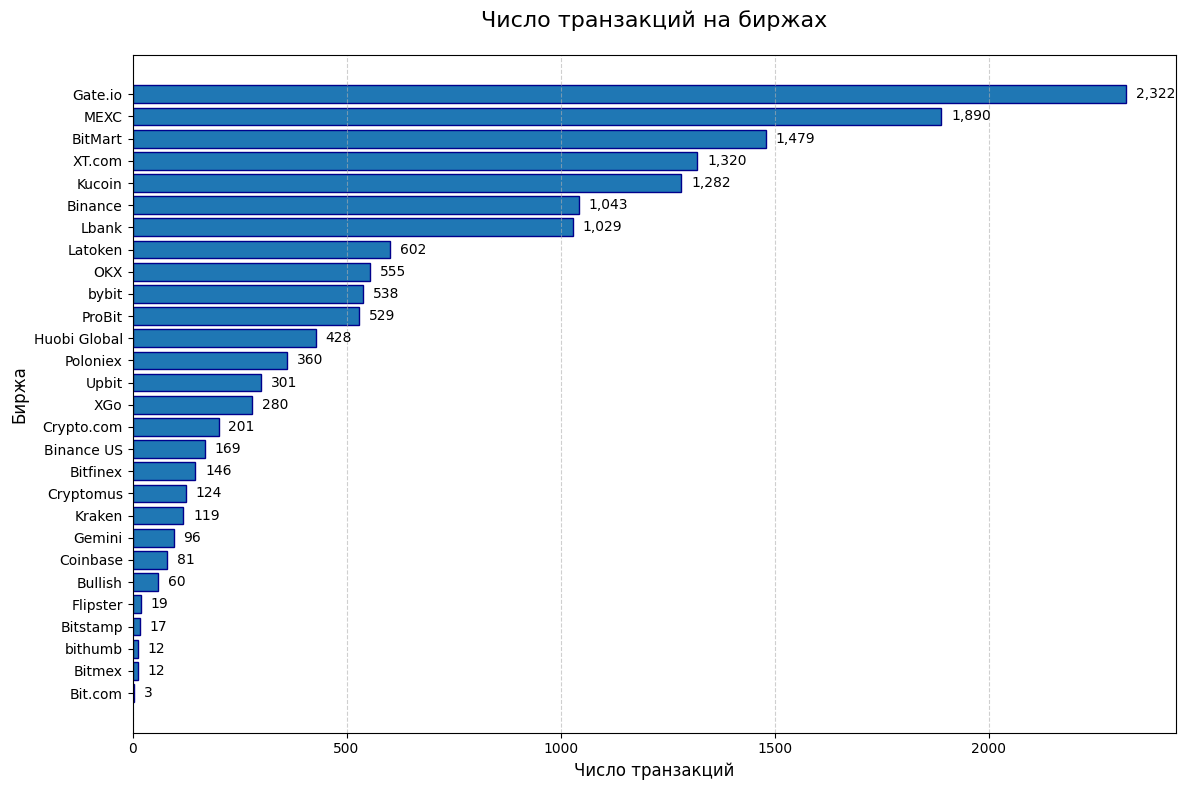

In [186]:
plt.figure(figsize=(12, 8))
bars = plt.barh(top_exchanges.index, top_exchanges.values, 
                 edgecolor='darkblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + max(top_exchanges.values)*0.01, bar.get_y() + bar.get_height()/2,
             f'{int(width):,}',
             va='center', ha='left', fontsize=10)

plt.title('Число транзакций на биржах', fontsize=16, pad=20)
plt.xlabel('Число транзакций', fontsize=12)
plt.ylabel('Биржа', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [187]:
df_filtered.columns

Index(['id_market', 'p', 'v', 'q', 'exchange_id', 'exchange', 'base_id',
       'base_code', 'quote_id', 'quote_code'],
      dtype='object')

In [188]:
top_10_currencies = df_filtered['base_code'].value_counts().head(10).index.tolist()
top_10_currencies

['ETH', 'SOL', 'BTC', 'XRP', 'LTC', 'DOGE', 'TRX', 'LINK', 'ADA', 'BCH']

In [189]:
least_important = df_filtered['base_code'].value_counts().tail(10).index.tolist()
least_important

['TKG',
 'BOOPA',
 'BRUH',
 'TYBG',
 'FEI',
 'DONS',
 'FLUFF',
 'RETARDIO',
 'CGV',
 'LON']

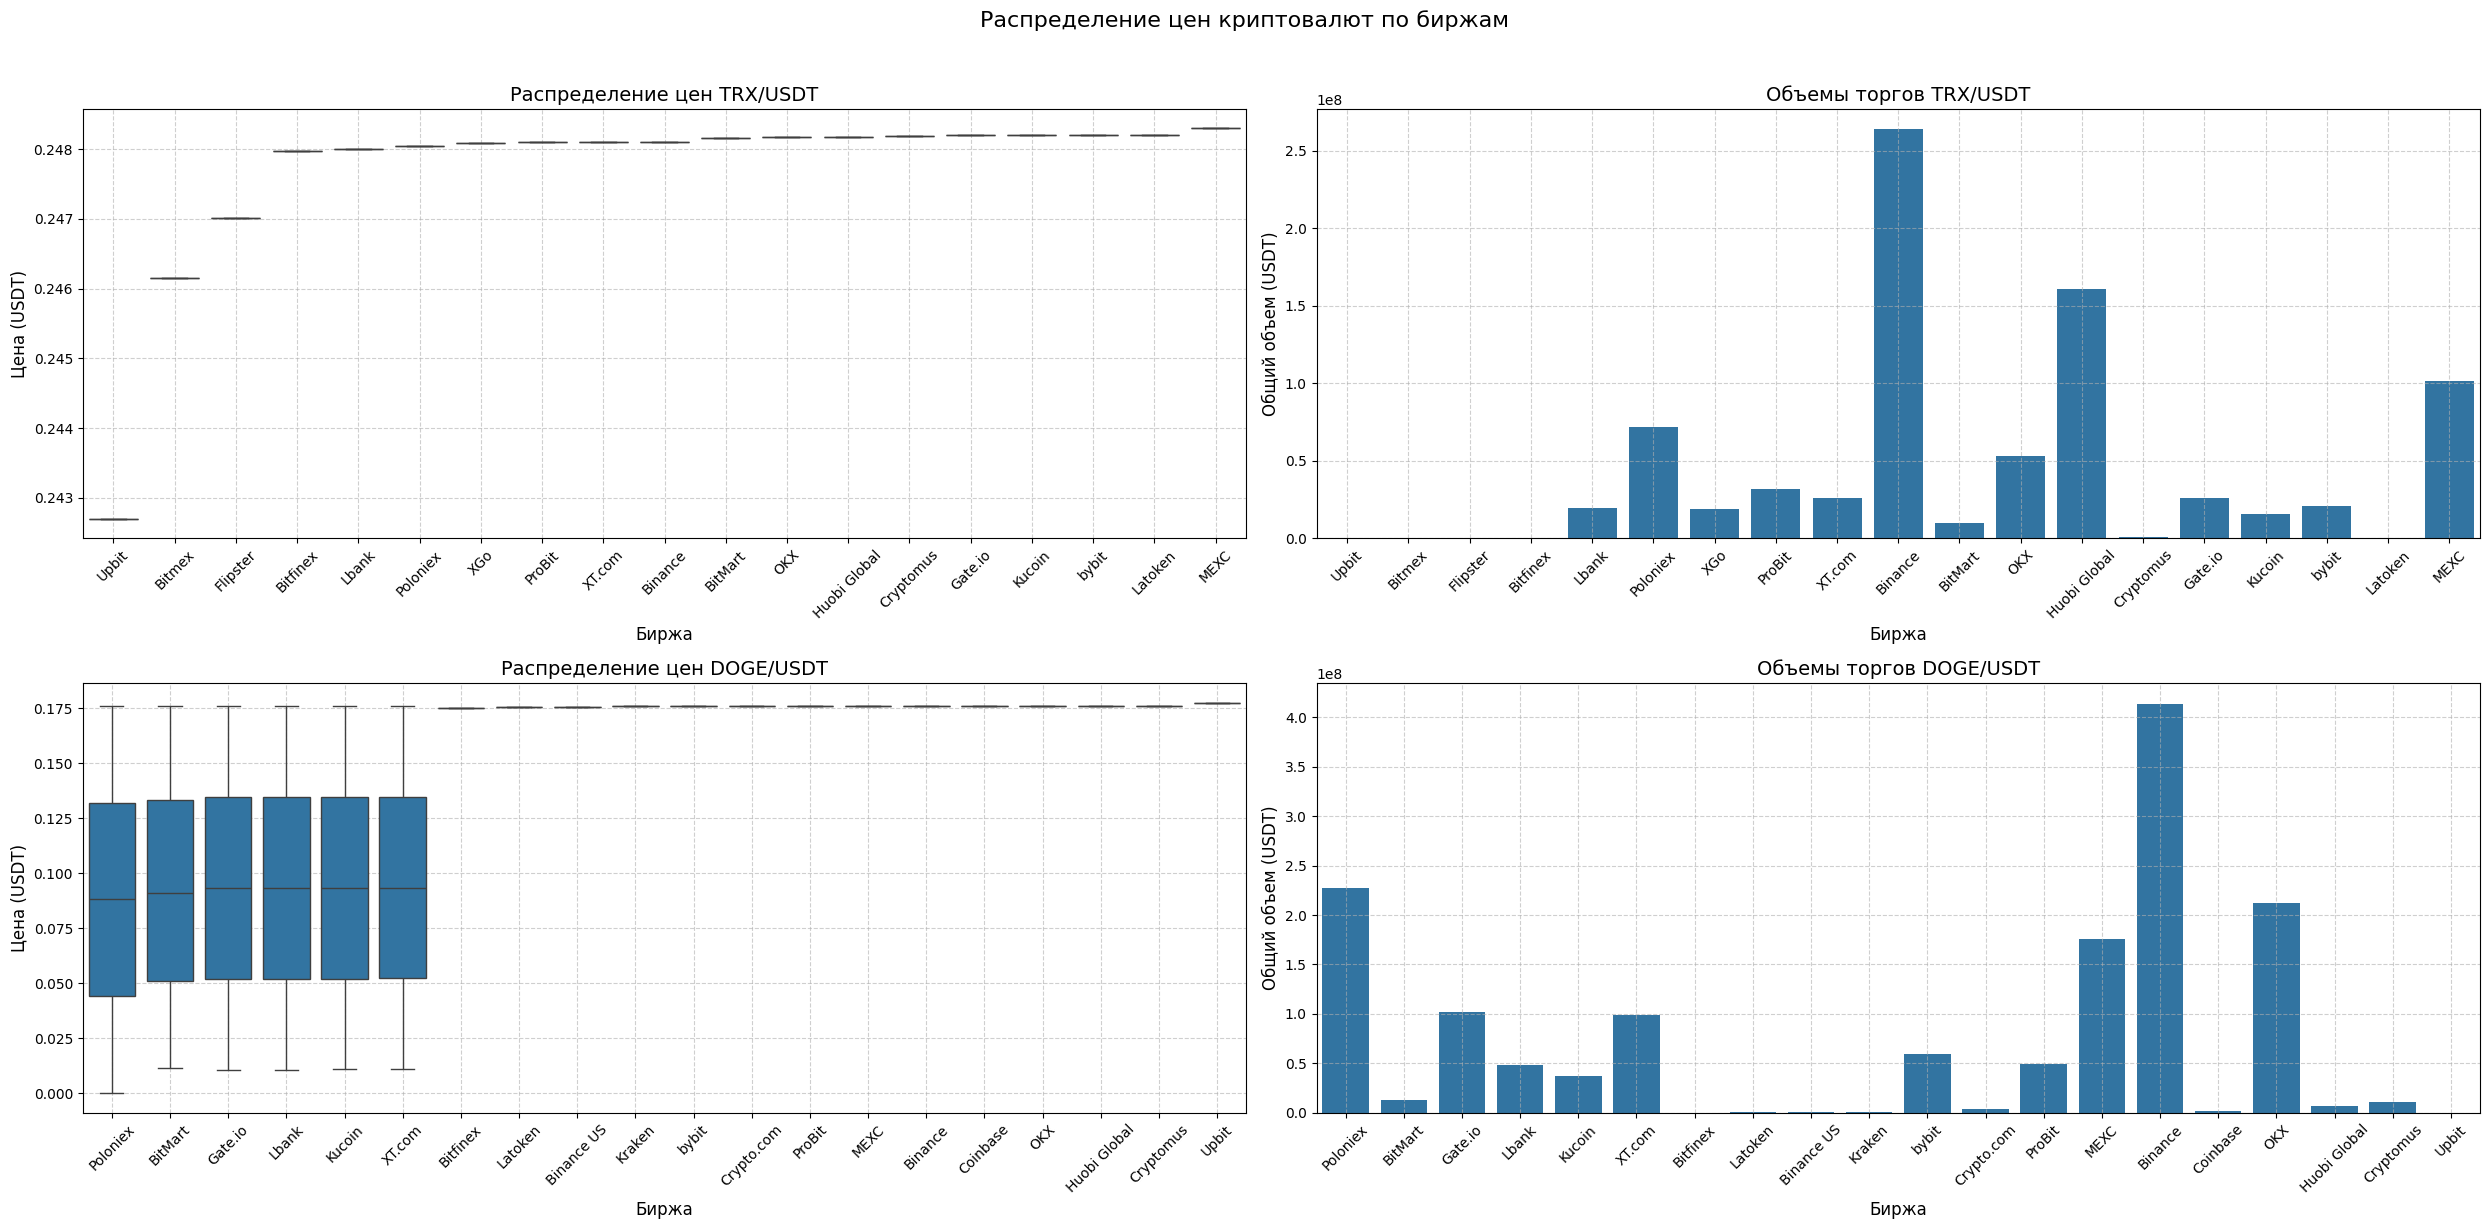

In [190]:
selected_currencies = ['TRX', 'DOGE']

# Создаем сетку графиков 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 12))
fig.suptitle('Распределение цен криптовалют по биржам', fontsize=16, y=1.02)

for i, currency in enumerate(selected_currencies):
    # Фильтруем данные по валюте и паре с USDT
    currency_data = df_filtered[(df_filtered['base_code'] == currency) & 
                               (df_filtered['quote_code'] == 'USDT')]
    
    # Агрегируем статистику по биржам
    exchange_stats = currency_data.groupby('exchange').agg({
        'p': ['mean', 'min', 'max', 'std'],
        'v': 'sum'
    }).reset_index()
    
    # Упрощаем мультииндекс столбцов
    exchange_stats.columns = ['exchange', 'price_mean', 'price_min', 
                            'price_max', 'price_std', 'volume_total']
    
    # Сортируем биржи по средней цене
    exchange_order = exchange_stats.sort_values('price_mean')['exchange']
    
    # Boxplot распределения цен
    ax = axes[i, 0]
    sns.boxplot(x='exchange', y='p', data=currency_data, 
               order=exchange_order, ax=ax)
    
    ax.set_title(f'Распределение цен {currency}/USDT', fontsize=14)
    ax.set_xlabel('Биржа', fontsize=12)
    ax.set_ylabel('Цена (USDT)', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # График объемов торгов
    ax = axes[i, 1]
    sns.barplot(x='exchange', y='volume_total', data=exchange_stats,
               order=exchange_order, ax=ax)
    
    ax.set_title(f'Объемы торгов {currency}/USDT', fontsize=14)
    ax.set_xlabel('Биржа', fontsize=12)
    ax.set_ylabel('Общий объем (USDT)', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [191]:
mask = (df_filtered['base_code'] != 'WBTC')&(df_filtered['quote_code'] != 'WBTC')
df_filtered = df_filtered[mask]
df_filtered

,id_market,p,v,q,exchange_id,exchange,base_id,base_code,quote_id,quote_code
3,423596,0.000031,319809222,1.028146e+04,134,BitMart,7825.0,WQT,15.0,USDT
4,1676204,0.000020,1074114,2.119149e+01,134,BitMart,22066.0,LGC,15.0,USDT
5,7612,0.000143,128664514,1.813956e+04,36,Gate.io,3975.0,BCX,15.0,USDT
6,7579169,0.022120,1183562,2.627499e+04,57,XT.com,943435.0,KFC,15.0,USDT
7,9309090,0.039580,42521875.38,1.778390e+06,36,Gate.io,1343745.0,MOODENG,15.0,USDT
...,...,...,...,...,...,...,...,...,...,...
22738,4992961,0.003000,4452.538,1.338093e+01,24,Poloniex,5295.0,SAMO,15.0,USDT
22739,6471644,0.000036,1333620087.1677,4.899349e+04,48,Kucoin,643592.0,WEN,15.0,USDT
22740,2774,0.624000,3312875.6,2.130179e+06,6,Binance,4611.0,SUSHI,15.0,USDT
22742,9485081,0.004036,12876053,5.140267e+04,48,Kucoin,1492788.0,LVVA,15.0,USDT


In [192]:
exchange_counts = df_filtered.groupby('base_code')['exchange'].nunique().reset_index()
exchange_counts.columns = ['currency', 'exchange_count']
exchange_counts

,currency,exchange_count
0,1,3
1,1CAT,6
2,1EARTH,2
3,1INCH,17
4,1ON8,3
...,...,...
2997,ZTX,4
2998,ZUZALU,1
2999,ZYGO,2
3000,ZYN,2


In [193]:
combined = pd.concat([df_filtered['base_code'], df_filtered['quote_id']])
total_counts = combined.value_counts().reset_index()

total_counts.columns = ['currency', 'transaction_count']

total_counts


,currency,transaction_count
0,15.0,12108
1,1.0,1221
2,2175.0,809
3,2.0,446
4,247551.0,130
...,...,...
3027,DONS,1
3028,FLUFF,1
3029,RETARDIO,1
3030,CGV,1


In [194]:
# Объединяем по столбцу 'currency' (или 'base_code' для exchange_counts)
merged_df = pd.merge(
    exchange_counts.rename(columns={'base_code': 'currency'}),  # Переименовываем для единообразия
    total_counts,
    on='currency',
    how='outer'  # Сохраняем все валюты из обоих DataFrame
).fillna(0)  # Заменяем NaN на 0 для отсутствующих значений

def is_number(s):
    try:
        float(s)  # Пробуем преобразовать в число
        return True
    except ValueError:
        return False

# Удаляем строки, где 'currency' можно преобразовать в число
merged_df = merged_df[~merged_df['currency'].apply(is_number)]
# Сортируем по убыванию количества транзакций

merged_df

,currency,exchange_count,transaction_count
31,1CAT,6.0,6
32,1EARTH,2.0,2
33,1INCH,17.0,20
34,1ON8,3.0,3
35,1SOL,2.0,2
...,...,...,...
3027,ZTX,4.0,4
3028,ZUZALU,1.0,1
3029,ZYGO,2.0,2
3030,ZYN,2.0,2


In [195]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Выбираем нужные признаки
X = merged_df[['exchange_count', 'transaction_count']]

# X_scaled = X
# # Масштабируем данные (K-means чувствителен к масштабу)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

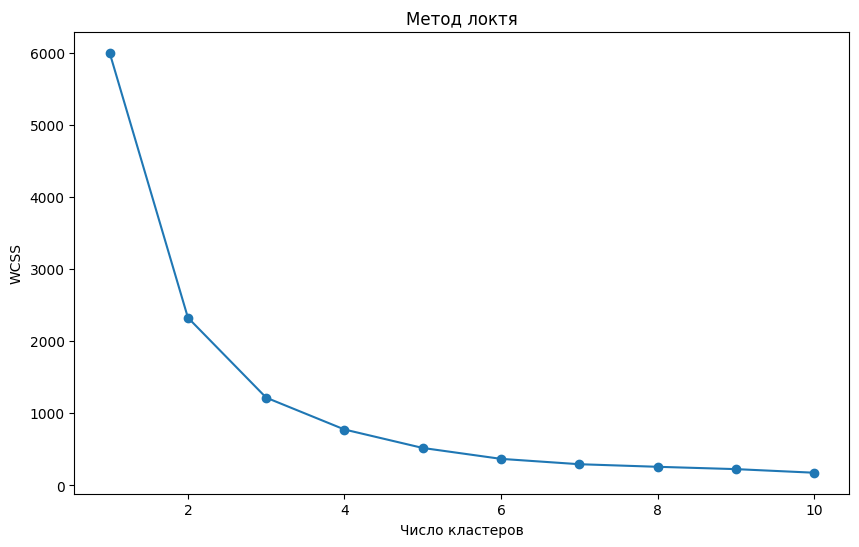

In [196]:
# Вычисляем сумму квадратов расстояний для разного числа кластеров
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Визуализация метода локтя
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Метод локтя')
plt.xlabel('Число кластеров')
plt.ylabel('WCSS')
plt.show()

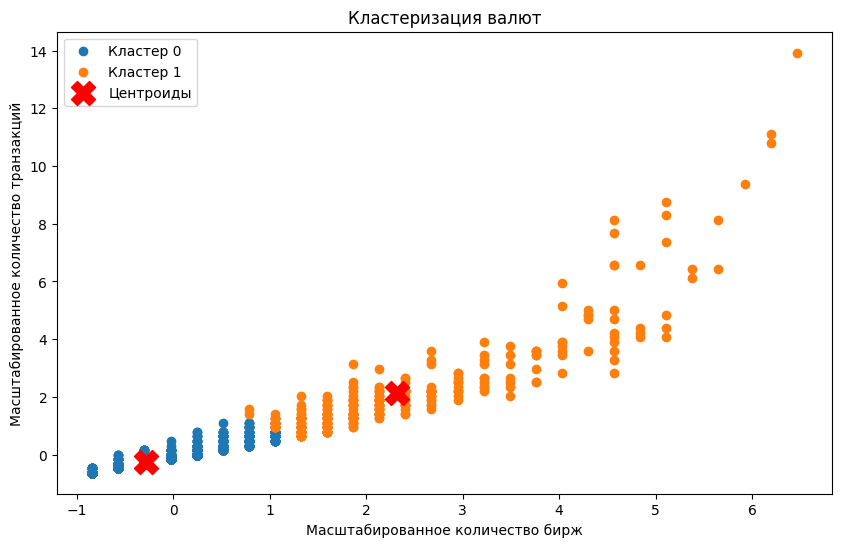

In [197]:
# Выбираем число кластеров (например, 3)
k = 2
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Добавляем метки кластеров в исходный DataFrame
merged_df['cluster'] = clusters
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.scatter(X_scaled[clusters == i, 0], 
                X_scaled[clusters == i, 1], 
                label=f'Кластер {i}')

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=300, c='red', marker='X', label='Центроиды')
plt.title('Кластеризация валют')
plt.xlabel('Масштабированное количество бирж')
plt.ylabel('Масштабированное количество транзакций')
plt.legend()
plt.show()

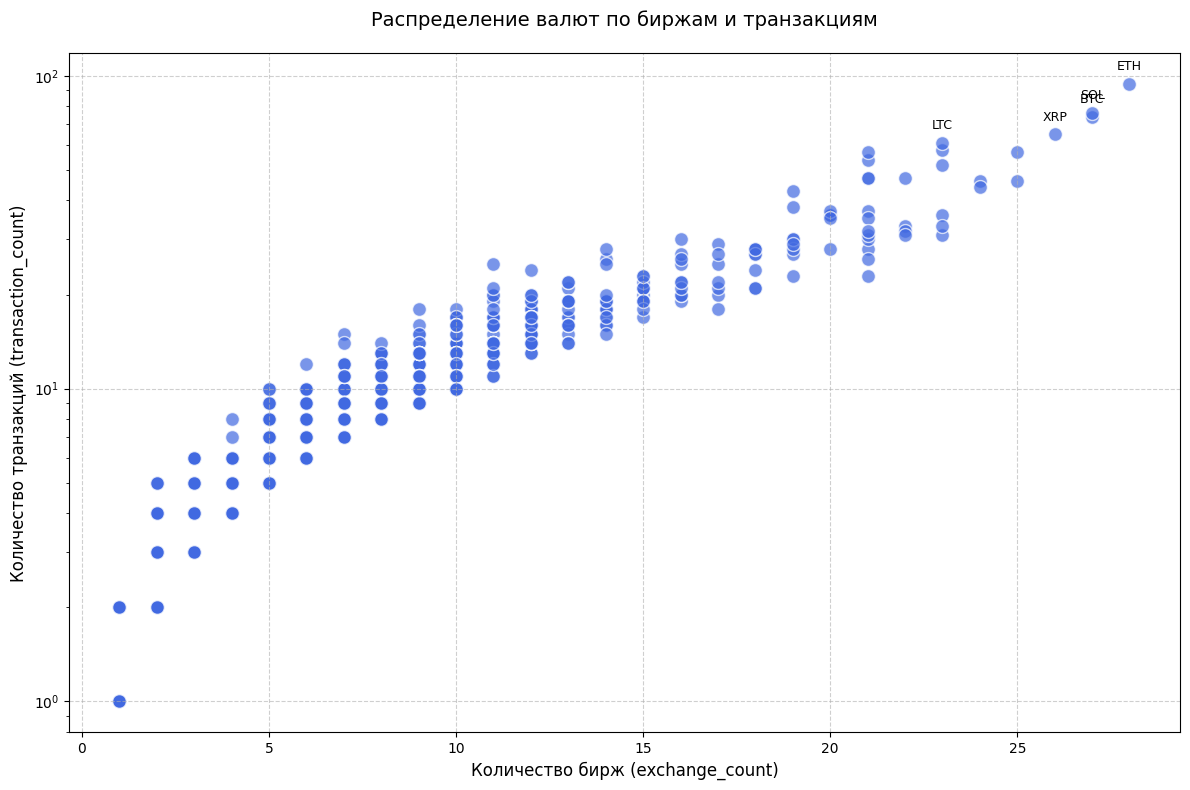

In [198]:
plt.figure(figsize=(12, 8))

# Создаем scatter plot
scatter = plt.scatter(
    x=merged_df['exchange_count'],
    y=merged_df['transaction_count'],
    c='royalblue',          # Цвет точек
    alpha=0.7,             # Прозрачность
    edgecolors='w',        # Границы точек
    s=100                 # Размер точек
)

# Добавляем подписи для самых активных валют
top_currencies = merged_df.nlargest(5, 'transaction_count')
least_currencies = merged_df.nsmallest(5, 'exchange_count')

for i, row in top_currencies.iterrows():
    plt.annotate(
        row['currency'],
        (row['exchange_count'], row['transaction_count']),
        textcoords="offset points",
        xytext=(0,10),
        ha='center',
        fontsize=9
    )


# Настройка осей и заголовка
plt.title('Распределение валют по биржам и транзакциям', fontsize=14, pad=20)
plt.xlabel('Количество бирж (exchange_count)', fontsize=12)
plt.ylabel('Количество транзакций (transaction_count)', fontsize=12)

# Логарифмическая шкала для оси Y (если данные сильно различаются)
plt.yscale('log')

# Сетка
plt.grid(True, linestyle='--', alpha=0.6)

# Убираем лишние поля
plt.tight_layout()

plt.show()

# Основные методы агрегирования

### VWAP с котируемой валютой USDT

In [199]:
vwap_df = df_filtered.groupby(['base_code', 'quote_code']).apply(
    lambda g: (g['p'] * g['q']).sum() / g['q'].sum() if g['q'].sum() > 0 else 0
).reset_index(name='vwap')
vwap_df

C:\Users\79636\AppData\Local\Temp\ipykernel_3308\2147806821.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vwap_df = df_filtered.groupby(['base_code', 'quote_code']).apply(


,base_code,quote_code,vwap
0,1,USDT,0.006113
1,1CAT,USDT,0.000223
2,1EARTH,USDT,0.000117
3,1INCH,BTC,0.000002
4,1INCH,ETH,0.000118
...,...,...,...
4539,ZTX,USDT,0.005960
4540,ZUZALU,USDT,0.000176
4541,ZYGO,USDT,0.002053
4542,ZYN,USDT,0.008621


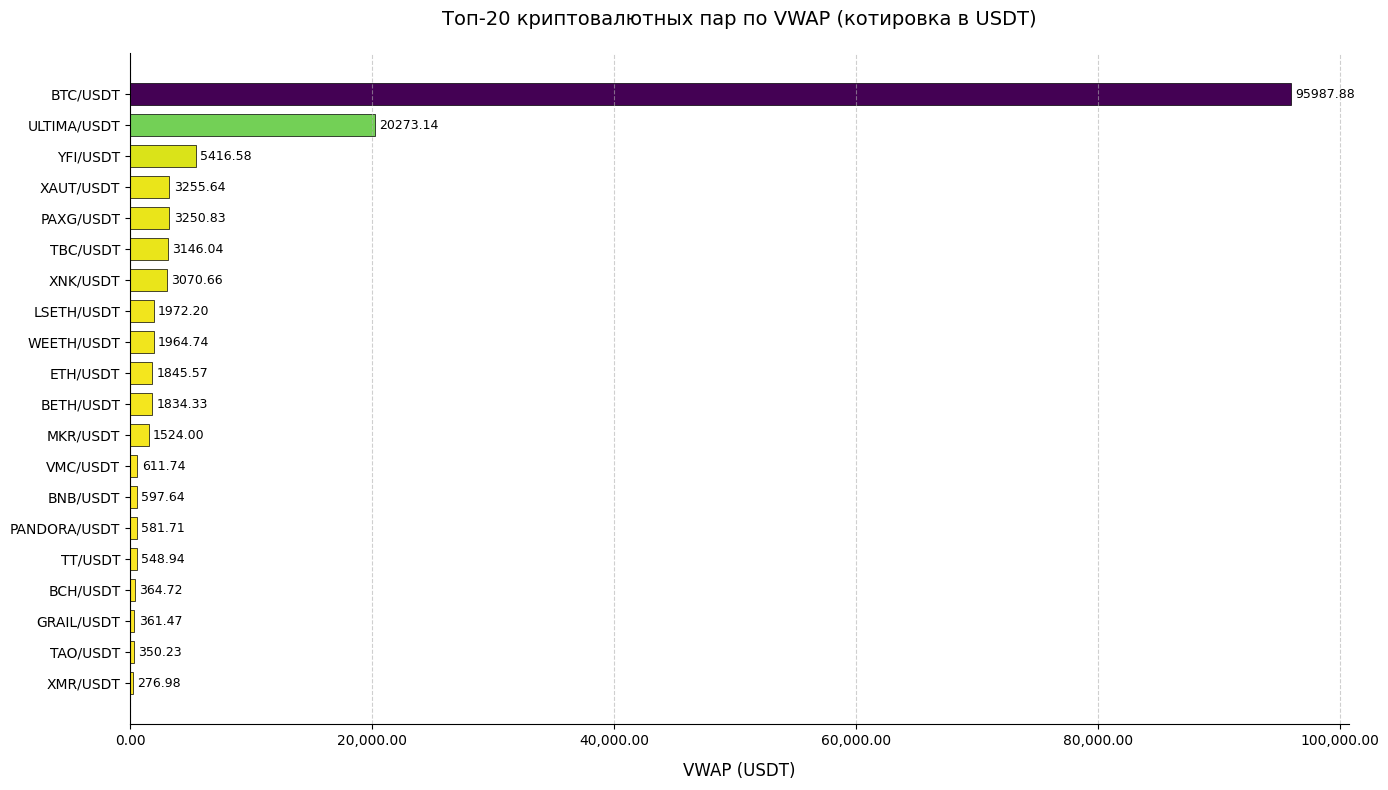

In [200]:
vwap_usdt = vwap_df[vwap_df['quote_code'] == 'USDT']
top_usdt = vwap_usdt.sort_values(by='vwap', ascending=False).head(20)
pair_names = top_usdt['base_code'] + '/' + top_usdt['quote_code']

plt.figure(figsize=(14, 8))
ax = plt.gca()

colors = plt.cm.viridis_r(top_usdt['vwap'] / max(top_usdt['vwap']))

bars = ax.barh(pair_names, top_usdt['vwap'], color=colors, edgecolor='black', linewidth=0.5, height=0.7)
ax.bar_label(bars, fmt='%.2f', padding=3, fontsize=9)

ax.set_xlabel('VWAP (USDT)', fontsize=12, labelpad=10)
ax.set_title('Топ-20 криптовалютных пар по VWAP (котировка в USDT)', 
             fontsize=14, pad=20)

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.xaxis.grid(True, linestyle='--', alpha=0.6)
ax.invert_yaxis()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

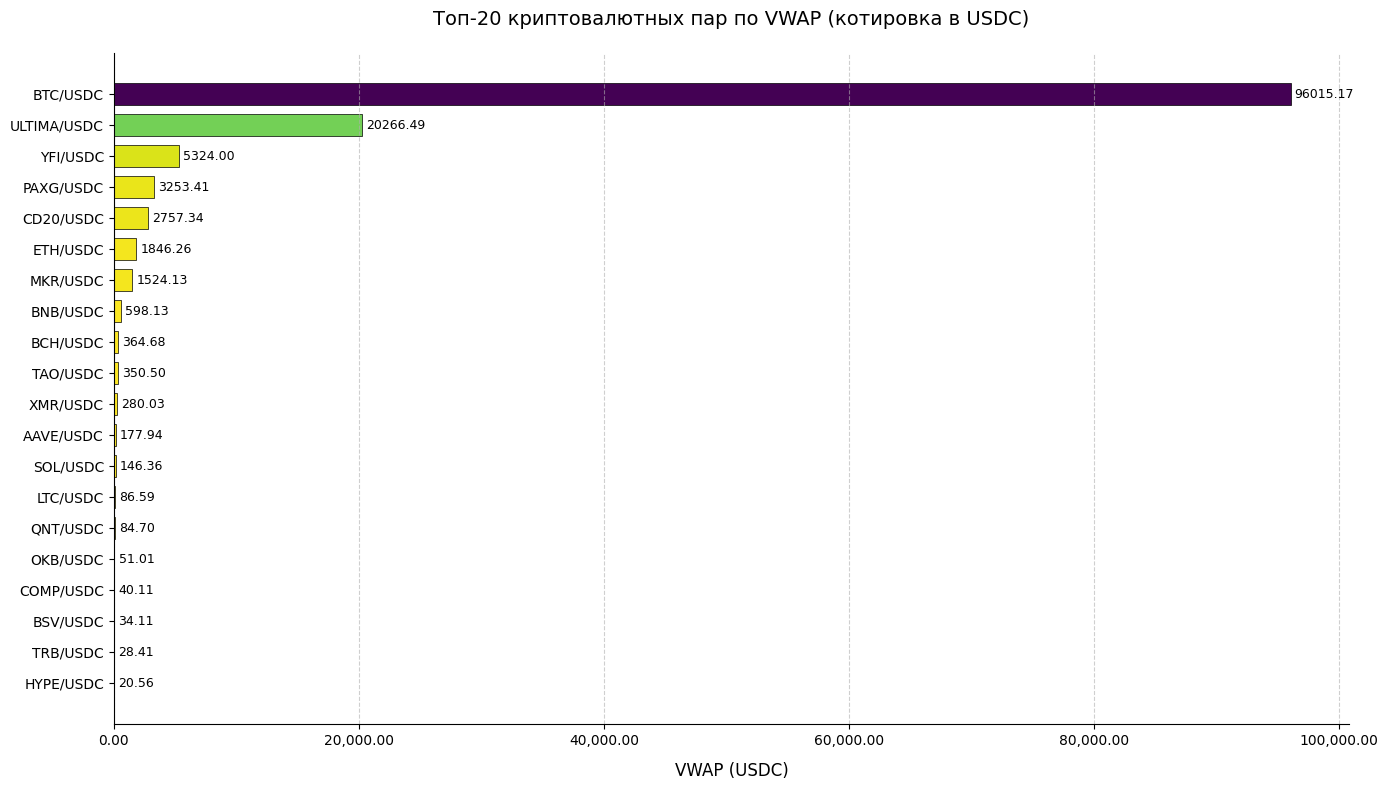

In [201]:
vwap_usdc = vwap_df[vwap_df['quote_code'] == 'USDC']
top_usdt = vwap_usdc.sort_values(by='vwap', ascending=False).head(20)
pair_names = top_usdt['base_code'] + '/' + top_usdt['quote_code']

plt.figure(figsize=(14, 8))
ax = plt.gca()

colors = plt.cm.viridis_r(top_usdt['vwap'] / max(top_usdt['vwap']))

bars = ax.barh(pair_names, top_usdt['vwap'], color=colors, edgecolor='black', linewidth=0.5, height=0.7)
ax.bar_label(bars, fmt='%.2f', padding=3, fontsize=9)

ax.set_xlabel('VWAP (USDC)', fontsize=12, labelpad=10)
ax.set_title('Топ-20 криптовалютных пар по VWAP (котировка в USDC)', 
             fontsize=14, pad=20)

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.xaxis.grid(True, linestyle='--', alpha=0.6)
ax.invert_yaxis()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

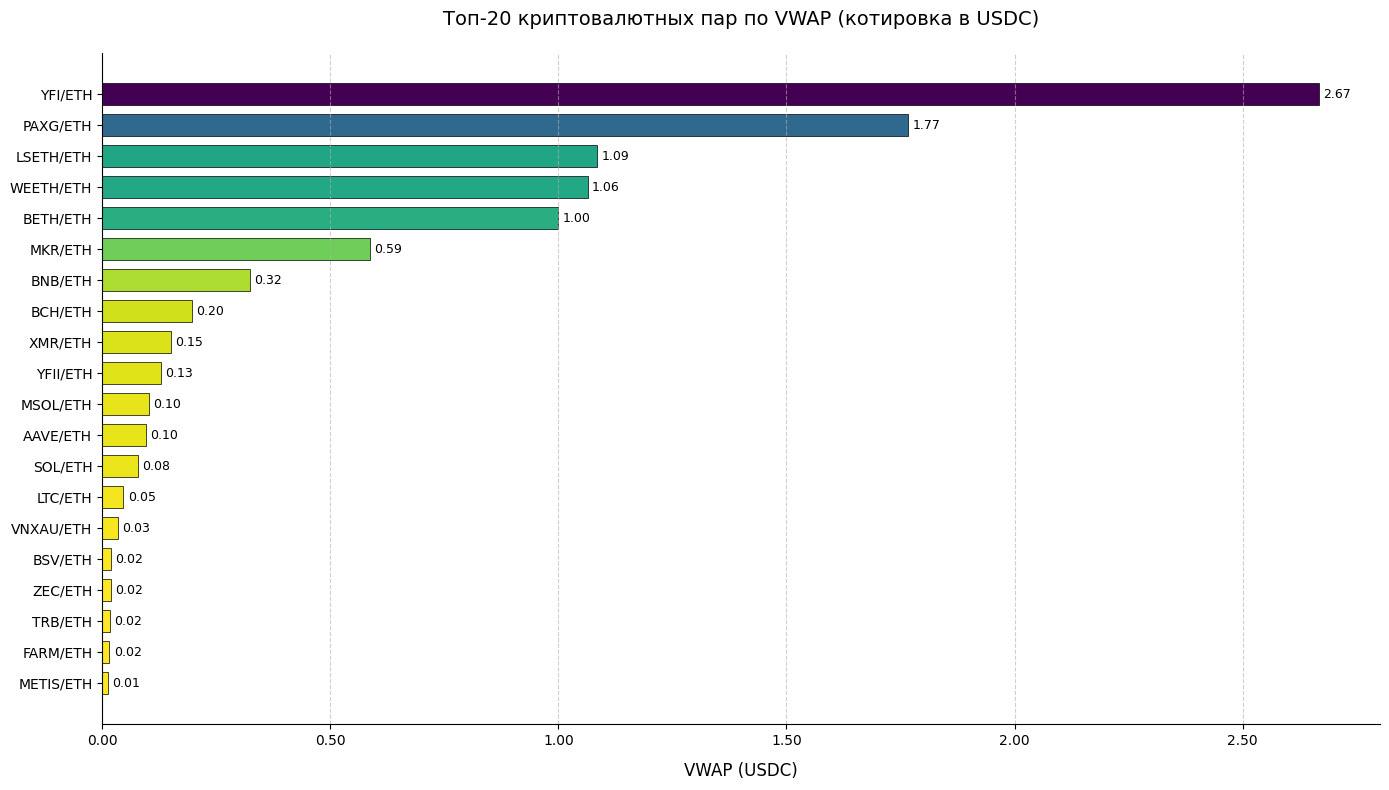

In [202]:
vwap_eph = vwap_df[vwap_df['quote_code'] == 'ETH']
top_usdt = vwap_eph.sort_values(by='vwap', ascending=False).head(20)
pair_names = top_usdt['base_code'] + '/' + top_usdt['quote_code']

plt.figure(figsize=(14, 8))
ax = plt.gca()

colors = plt.cm.viridis_r(top_usdt['vwap'] / max(top_usdt['vwap']))

bars = ax.barh(pair_names, top_usdt['vwap'], color=colors, edgecolor='black', linewidth=0.5, height=0.7)
ax.bar_label(bars, fmt='%.2f', padding=3, fontsize=9)

ax.set_xlabel('VWAP (USDC)', fontsize=12, labelpad=10)
ax.set_title('Топ-20 криптовалютных пар по VWAP (котировка в USDC)', 
             fontsize=14, pad=20)

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.xaxis.grid(True, linestyle='--', alpha=0.6)
ax.invert_yaxis()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

### Медиана


In [203]:
usdt_pairs = df_filtered[df_filtered['quote_code'] == 'USDT']
median_prices = usdt_pairs.groupby('base_code')['p'].median().reset_index()
median_prices.columns = ['currency', 'median_price_usdt']
median_prices = median_prices.sort_values('median_price_usdt', ascending=False)
median_prices

,currency,median_price_usdt
402,BTC,9.598713e+04
2662,ULTIMA,2.022580e+04
2925,YFI,5.415700e+03
2862,XAUT,3.256400e+03
1939,PAXG,3.254000e+03
...,...,...
2358,SMILEY,1.284500e-12
907,FLOKICEO,1.120000e-12
2325,SIMPSON,7.567500e-13
1526,MAGAPEPE,7.470000e-13


C:\Users\79636\AppData\Local\Temp\ipykernel_3308\3378262149.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


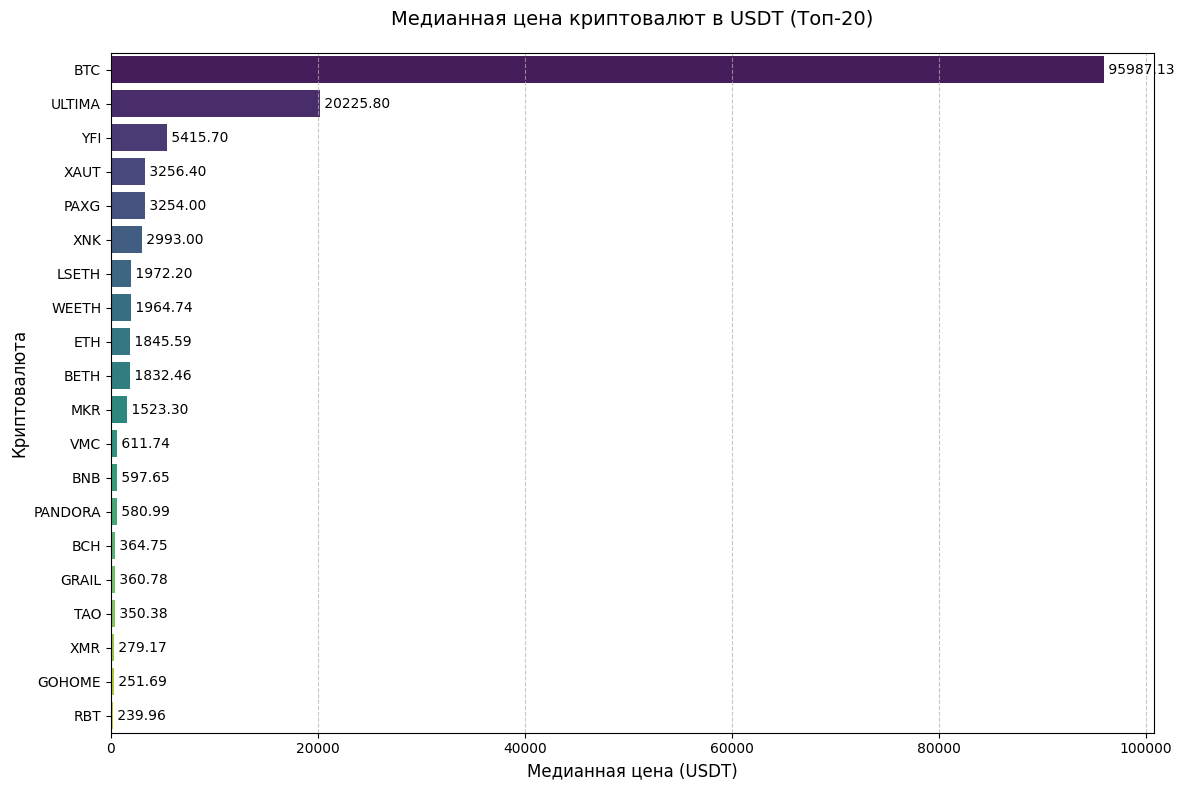

In [204]:
plt.figure(figsize=(12, 8))

barplot = sns.barplot(
    data=median_prices.head(20),
    x='median_price_usdt',
    y='currency',
    palette='viridis'
)

for i, price in enumerate(median_prices.head(20)['median_price_usdt']):
    barplot.text(price, i, f' {price:.2f}', va='center')

plt.title('Медианная цена криптовалют в USDT (Топ-20)', fontsize=14, pad=20)
plt.xlabel('Медианная цена (USDT)', fontsize=12)
plt.ylabel('Криптовалюта', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [205]:
usdt_pairs_usdc = df_filtered[df_filtered['quote_code'] == 'USDT']
median_prices_usdc = usdt_pairs_usdc.groupby('base_code')['p'].median().reset_index()
median_prices_usdc.columns = ['currency', 'median_price_usdt']
median_prices_usdc = median_prices_usdc.sort_values('median_price_usdt', ascending=False)
median_prices_usdc

,currency,median_price_usdt
402,BTC,9.598713e+04
2662,ULTIMA,2.022580e+04
2925,YFI,5.415700e+03
2862,XAUT,3.256400e+03
1939,PAXG,3.254000e+03
...,...,...
2358,SMILEY,1.284500e-12
907,FLOKICEO,1.120000e-12
2325,SIMPSON,7.567500e-13
1526,MAGAPEPE,7.470000e-13


C:\Users\79636\AppData\Local\Temp\ipykernel_3308\741634465.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


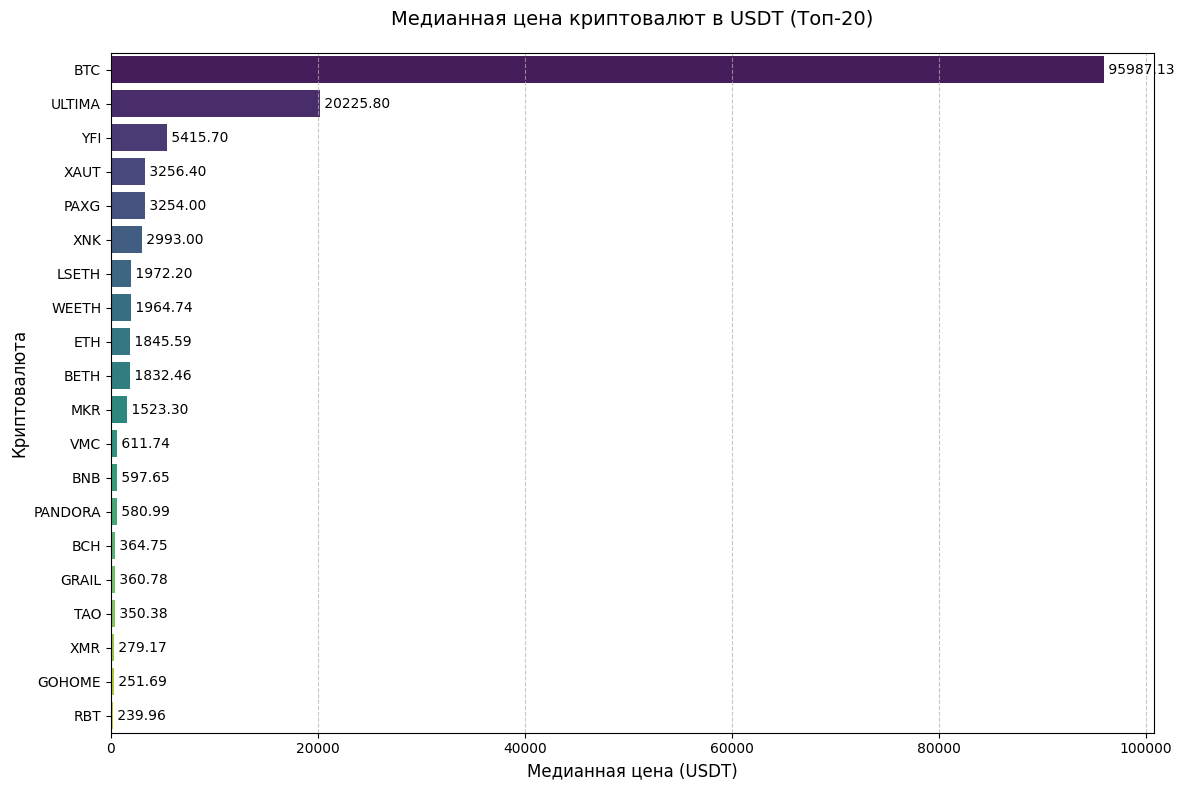

In [206]:
plt.figure(figsize=(12, 8))

barplot = sns.barplot(
    data=median_prices_usdc.head(20),
    x='median_price_usdt',
    y='currency',
    palette='viridis'
)

for i, price in enumerate(median_prices_usdc.head(20)['median_price_usdt']):
    barplot.text(price, i, f' {price:.2f}', va='center')

plt.title('Медианная цена криптовалют в USDT (Топ-20)', fontsize=14, pad=20)
plt.xlabel('Медианная цена (USDT)', fontsize=12)
plt.ylabel('Криптовалюта', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [207]:
usdt_pairs_eth = df_filtered[df_filtered['quote_code'] == 'ETH']
usdt_pairs_eth = usdt_pairs_eth.groupby('base_code')['p'].median().reset_index()
usdt_pairs_eth.columns = ['currency', 'median_price_usdt']
usdt_pairs_eth = usdt_pairs_eth.sort_values('median_price_usdt', ascending=False)
usdt_pairs_eth

,currency,median_price_usdt
291,YFI,2.667500e+00
196,PAXG,1.767440e+00
156,LSETH,1.081815e+00
277,WEETH,1.064000e+00
40,BETH,9.991000e-01
...,...,...
92,EGC,1.000000e-08
67,COW,1.310000e-09
52,BTT,3.585000e-10
167,MELO,8.510000e-11


C:\Users\79636\AppData\Local\Temp\ipykernel_3308\1555091566.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


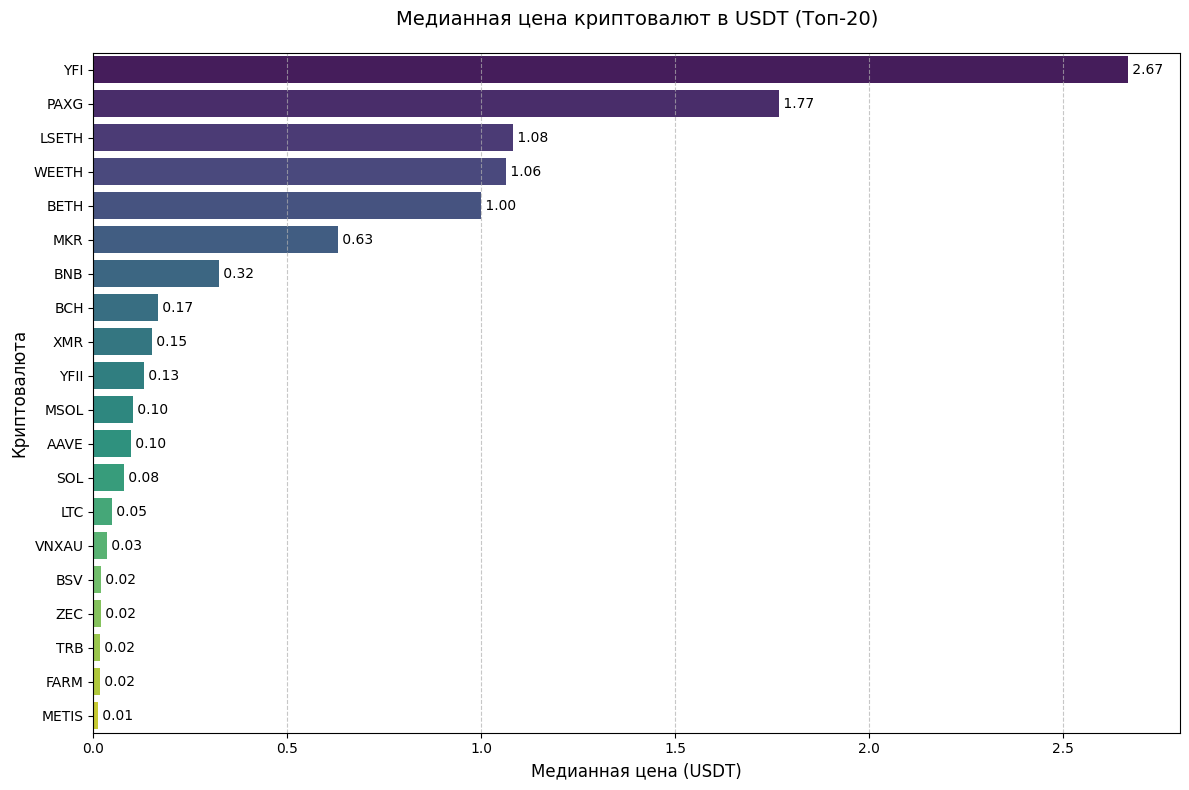

In [208]:
plt.figure(figsize=(12, 8))

barplot = sns.barplot(
    data=usdt_pairs_eth.head(20),
    x='median_price_usdt',
    y='currency',
    palette='viridis'
)

for i, price in enumerate(usdt_pairs_eth.head(20)['median_price_usdt']):
    barplot.text(price, i, f' {price:.2f}', va='center')

plt.title('Медианная цена криптовалют в USDT (Топ-20)', fontsize=14, pad=20)
plt.xlabel('Медианная цена (USDT)', fontsize=12)
plt.ylabel('Криптовалюта', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### VWAP с учетом индекса надежности

In [209]:
def get_exchange_trust_scores_api():
    url = "https://api.coingecko.com/api/v3/exchanges"
    
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        
        exchanges = []
        trust_scores = []
        
        for exchange in data:
            exchanges.append(exchange['name'])
            trust_scores.append(exchange.get('trust_score', 'N/A'))
        
        return pd.DataFrame({
            'Exchange': exchanges,
            'Trust Score': trust_scores
        })
        
    except Exception as e:
        print(f"Ошибка API: {e}")
        return None

trust_df = get_exchange_trust_scores_api()
trust_df

,Exchange,Trust Score
0,Binance,10
1,Bybit,10
2,Bitget,10
3,OKX,10
4,Coinbase Exchange,10
...,...,...
95,Uniswap V3 (BSC),6
96,PancakeSwap V3 (Base),6
97,Fastex,6
98,FMCPAY,6


In [210]:
df_exchanges['name_lower'] = df_exchanges['name'].str.lower()
trust_df['Exchange_lower'] = trust_df['Exchange'].str.lower()

In [211]:
df_exchanges_ts = pd.merge(
    df_exchanges,
    trust_df,
    left_on='name_lower',
    right_on='Exchange_lower',
    how='left'
).drop(['name_lower', 'Exchange_lower', 'Exchange', 'cmc_id', 'site'], axis=1)  # Удаляем временные колонки
df_exchanges_ts.loc[df_exchanges_ts['name'] == 'Huobi Global', 'Trust Score'] = 9
df_exchanges_ts.loc[df_exchanges_ts['name'] == 'Coinbase', 'Trust Score'] = 10
df_exchanges_ts.loc[df_exchanges_ts['name'] == 'Gate.io', 'Trust Score'] = 9
df_exchanges_ts.loc[df_exchanges_ts['name'] == 'ProBit', 'Trust Score'] = 3
df_exchanges_ts.loc[df_exchanges_ts['name'] == 'Crypto.com', 'Trust Score'] = 10
df_exchanges_ts['Trust Score'] = df_exchanges_ts['Trust Score'].fillna(df_exchanges_ts['Trust Score'].mean())

df_exchanges_ts

,id,name,Trust Score
0,1,XGo,8.521739
1,2,bithumb,7.000000
2,5,Huobi Global,9.000000
3,6,Binance,10.000000
4,8,Bitfinex,9.000000
5,15,Lbank,7.000000
6,21,Coinbase,10.000000
7,22,Kraken,10.000000
8,24,Poloniex,8.521739
9,26,Bitstamp,9.000000


In [212]:
ts_filtered_df = pd.merge(
    df_filtered,
    df_exchanges_ts,
    left_on='exchange_id',
    right_on='id',
    how='left'
).drop(['name', 'id'], axis=1) 
ts_filtered_df

,id_market,p,v,q,exchange_id,exchange,base_id,base_code,quote_id,quote_code,Trust Score
0,423596,0.000031,319809222,1.028146e+04,134,BitMart,7825.0,WQT,15.0,USDT,8.000000
1,1676204,0.000020,1074114,2.119149e+01,134,BitMart,22066.0,LGC,15.0,USDT,8.000000
2,7612,0.000143,128664514,1.813956e+04,36,Gate.io,3975.0,BCX,15.0,USDT,9.000000
3,7579169,0.022120,1183562,2.627499e+04,57,XT.com,943435.0,KFC,15.0,USDT,8.000000
4,9309090,0.039580,42521875.38,1.778390e+06,36,Gate.io,1343745.0,MOODENG,15.0,USDT,9.000000
...,...,...,...,...,...,...,...,...,...,...,...
14986,4992961,0.003000,4452.538,1.338093e+01,24,Poloniex,5295.0,SAMO,15.0,USDT,8.521739
14987,6471644,0.000036,1333620087.1677,4.899349e+04,48,Kucoin,643592.0,WEN,15.0,USDT,9.000000
14988,2774,0.624000,3312875.6,2.130179e+06,6,Binance,4611.0,SUSHI,15.0,USDT,10.000000
14989,9485081,0.004036,12876053,5.140267e+04,48,Kucoin,1492788.0,LVVA,15.0,USDT,9.000000


In [213]:
def vwap_with_reliability(
    df: pd.DataFrame,
    base_col: str = 'base_code',
    quote_col: str = 'quote_code',
    price_col: str = 'p',
    volume_col: str = 'q',
    reliability_col: str = 'Trust Score'
) -> pd.DataFrame:

    # Проверка наличия необходимых колонок
    required_cols = [base_col, quote_col, price_col, volume_col, reliability_col]
    missing_cols = [col for col in required_cols if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Отсутствуют колонки: {missing_cols}")
    
    weighted_price = df[price_col] * df[volume_col] * df[reliability_col]
    weighted_volume = df[volume_col] * df[reliability_col]
    
    result = (
        df.groupby([base_col, quote_col])
        .apply(
            lambda x: weighted_price[x.index].sum() / weighted_volume[x.index].sum()
            if weighted_volume[x.index].sum() > 0
            else np.nan
        )
        .reset_index(name='vwap')
    )
    
    return result

vwap_result = vwap_with_reliability(ts_filtered_df[ts_filtered_df['quote_code'] == 'USDT'])
vwap_result

C:\Users\79636\AppData\Local\Temp\ipykernel_3308\989204326.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


,base_code,quote_code,vwap
0,1,USDT,0.006111
1,1CAT,USDT,0.000223
2,1EARTH,USDT,0.000117
3,1INCH,USDT,0.198124
4,1ON8,USDT,0.005369
...,...,...,...
2981,ZTX,USDT,0.005827
2982,ZUZALU,USDT,0.000176
2983,ZYGO,USDT,0.002053
2984,ZYN,USDT,0.008582


In [214]:
vwap_result = vwap_result.drop(columns='quote_code')
vwap_result.columns = ['currency', 'reliable_vwap_usdt']
vwap_result = vwap_result.sort_values('reliable_vwap_usdt', ascending=False)
vwap_result

,currency,reliable_vwap_usdt
402,BTC,9.598783e+04
2662,ULTIMA,2.027359e+04
2925,YFI,5.416682e+03
2533,TBC,3.457342e+03
2862,XAUT,3.255235e+03
...,...,...
2358,SMILEY,1.460598e-12
907,FLOKICEO,8.142101e-13
2325,SIMPSON,7.828660e-13
1526,MAGAPEPE,4.015577e-13


C:\Users\79636\AppData\Local\Temp\ipykernel_3308\945741111.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


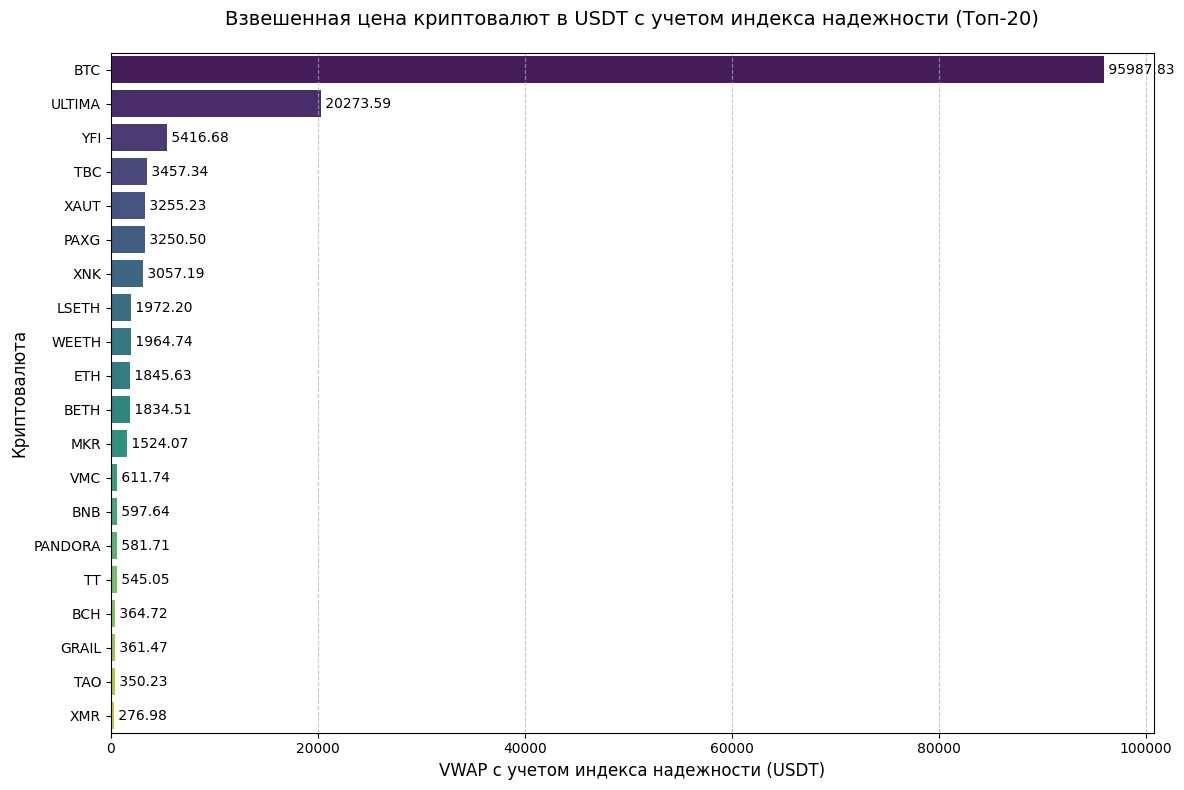

In [215]:
plt.figure(figsize=(12, 8))

barplot = sns.barplot(
    data=vwap_result.head(20),
    x='reliable_vwap_usdt',
    y='currency',
    palette='viridis'
)

for i, price in enumerate(vwap_result.head(20)['reliable_vwap_usdt']):
    barplot.text(price, i, f' {price:.2f}', va='center')

plt.title('Взвешенная цена криптовалют в USDT с учетом индекса надежности (Топ-20)', fontsize=14, pad=20)
plt.xlabel('VWAP с учетом индекса надежности (USDT)', fontsize=12)
plt.ylabel('Криптовалюта', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

C:\Users\79636\AppData\Local\Temp\ipykernel_3308\989204326.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(
C:\Users\79636\AppData\Local\Temp\ipykernel_3308\1223344021.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


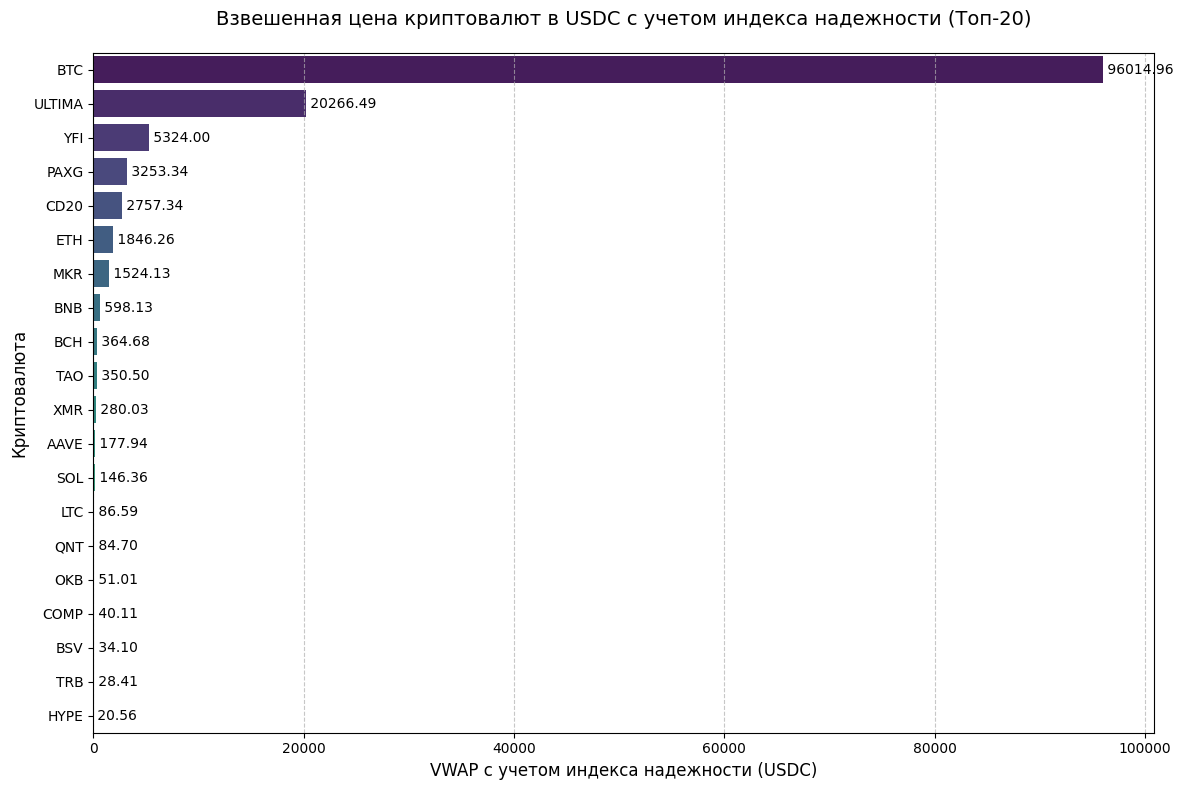

In [216]:
vwap_result_usdc = vwap_with_reliability(ts_filtered_df[ts_filtered_df['quote_code'] == 'USDC'])
vwap_result_usdc = vwap_result_usdc.drop(columns='quote_code')
vwap_result_usdc.columns = ['currency', 'reliable_vwap_usdt']
vwap_result_usdc = vwap_result_usdc.sort_values('reliable_vwap_usdt', ascending=False)

plt.figure(figsize=(12, 8))

barplot = sns.barplot(
    data=vwap_result_usdc.head(20),
    x='reliable_vwap_usdt',
    y='currency',
    palette='viridis'
)

for i, price in enumerate(vwap_result_usdc.head(20)['reliable_vwap_usdt']):
    barplot.text(price, i, f' {price:.2f}', va='center')

plt.title('Взвешенная цена криптовалют в USDC с учетом индекса надежности (Топ-20)', fontsize=14, pad=20)
plt.xlabel('VWAP с учетом индекса надежности (USDC)', fontsize=12)
plt.ylabel('Криптовалюта', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

C:\Users\79636\AppData\Local\Temp\ipykernel_3308\989204326.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(
C:\Users\79636\AppData\Local\Temp\ipykernel_3308\4289812692.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


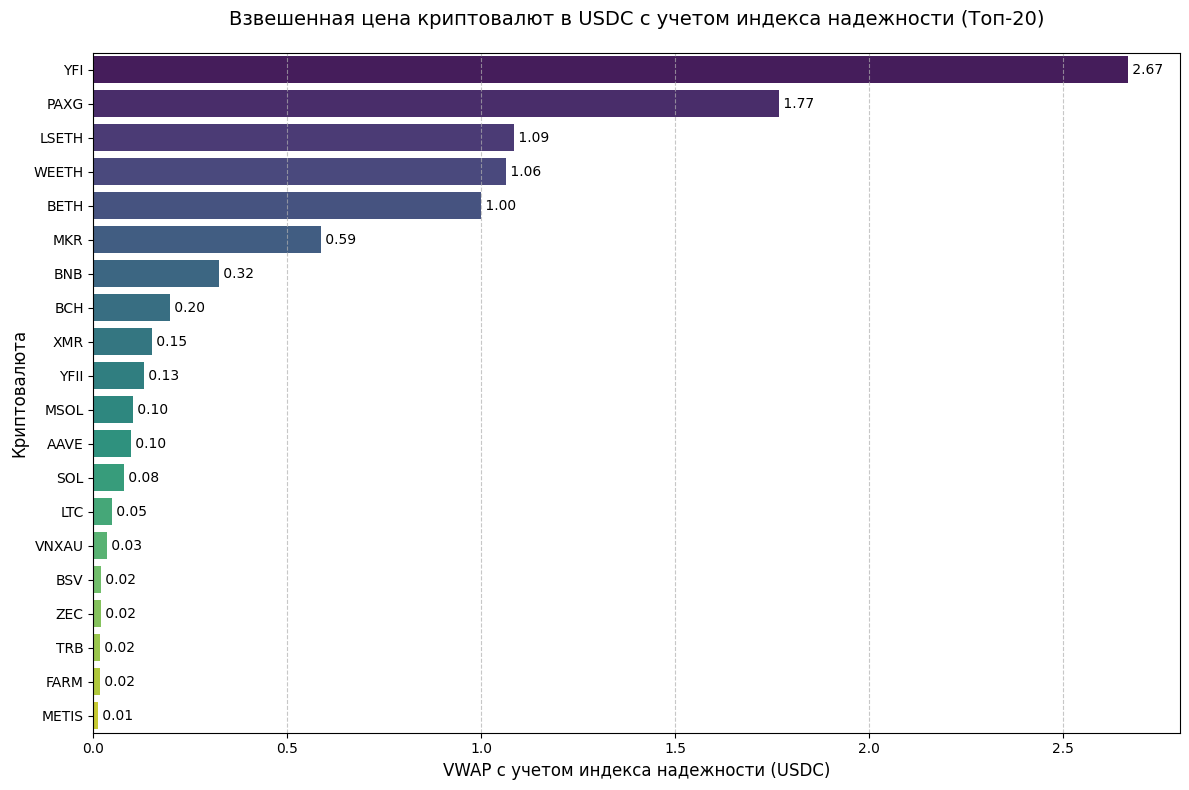

In [217]:
vwap_result_usdc = vwap_with_reliability(ts_filtered_df[ts_filtered_df['quote_code'] == 'ETH'])
vwap_result_usdc = vwap_result_usdc.drop(columns='quote_code')
vwap_result_usdc.columns = ['currency', 'reliable_vwap_usdt']
vwap_result_usdc = vwap_result_usdc.sort_values('reliable_vwap_usdt', ascending=False)

plt.figure(figsize=(12, 8))

barplot = sns.barplot(
    data=vwap_result_usdc.head(20),
    x='reliable_vwap_usdt',
    y='currency',
    palette='viridis'
)

for i, price in enumerate(vwap_result_usdc.head(20)['reliable_vwap_usdt']):
    barplot.text(price, i, f' {price:.2f}', va='center')

plt.title('Взвешенная цена криптовалют в USDC с учетом индекса надежности (Топ-20)', fontsize=14, pad=20)
plt.xlabel('VWAP с учетом индекса надежности (USDC)', fontsize=12)
plt.ylabel('Криптовалюта', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Сравнение значений при разных подходах

In [218]:
top_10_currencies = ts_filtered_df['base_code'].value_counts().head(10).index.tolist()
top_10_currencies

['ETH', 'SOL', 'BTC', 'XRP', 'LTC', 'DOGE', 'LINK', 'TRX', 'ADA', 'BCH']

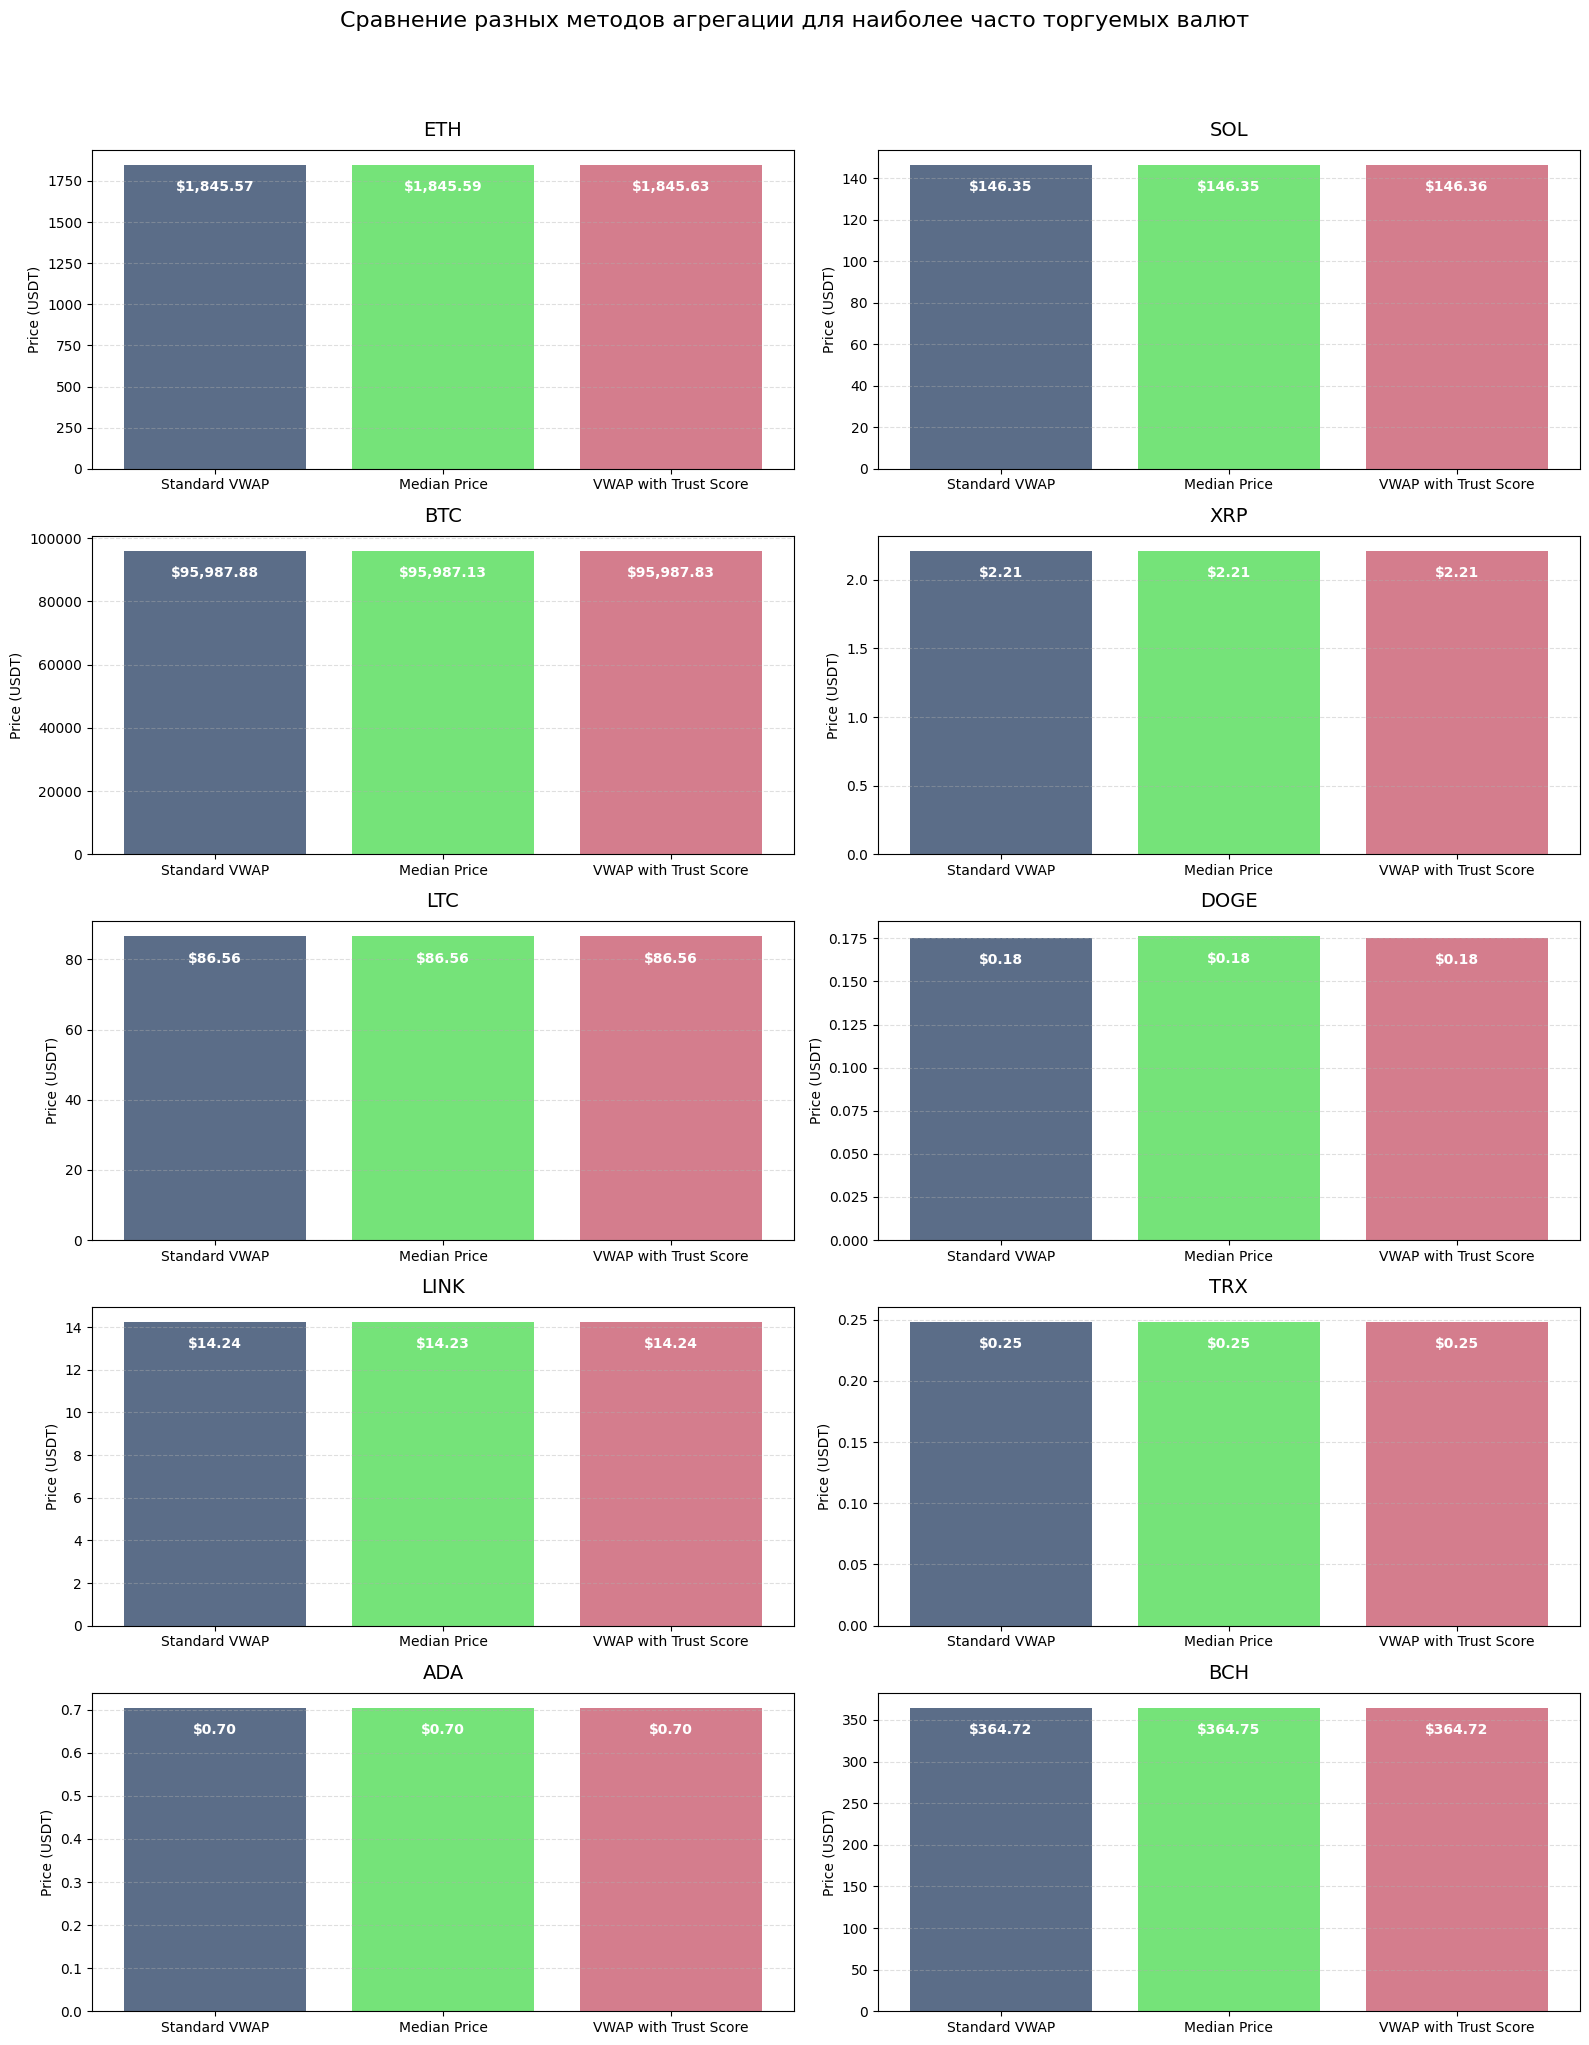

In [219]:
colors = ["#32486B", "#52DD57", "#CA5D71"]

fig, axes = plt.subplots(5, 2, figsize=(16, 20))
fig.suptitle('Сравнение разных методов агрегации для наиболее часто торгуемых валют', 
             fontsize=16, y=1.02)

for idx, currency in enumerate(top_10_currencies):
    ax = axes[idx//2, idx%2]
    
    median_price = median_prices.loc[median_prices['currency'] == currency, 'median_price_usdt']
    vwap_reliable = vwap_result.loc[vwap_result['currency'] == currency, 'reliable_vwap_usdt']
    vwap_regular = vwap_usdt.loc[vwap_usdt['base_code'] == currency, 'vwap']
    
    metrics = []
    values = []

    if not vwap_regular.empty:
        metrics.append('Standard VWAP')
        values.append(vwap_regular.values[0])
    
    if not median_price.empty:
        metrics.append('Median Price')
        values.append(median_price.values[0])
    
    if not vwap_reliable.empty:
        metrics.append('VWAP with Trust Score')
        values.append(vwap_reliable.values[0])
    
    
    bars = ax.bar(metrics, values, color=colors[:len(metrics)], alpha=0.8)
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height*0.95,
                f'${height:,.2f}',
                ha='center', va='top', color='white',
                fontweight='bold', fontsize=10)
    
    ax.set_title(currency, fontsize=14, pad=10)
    ax.set_ylabel('Price (USDT)', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.4)
    

plt.tight_layout()
plt.subplots_adjust(top=0.95) 
plt.show()

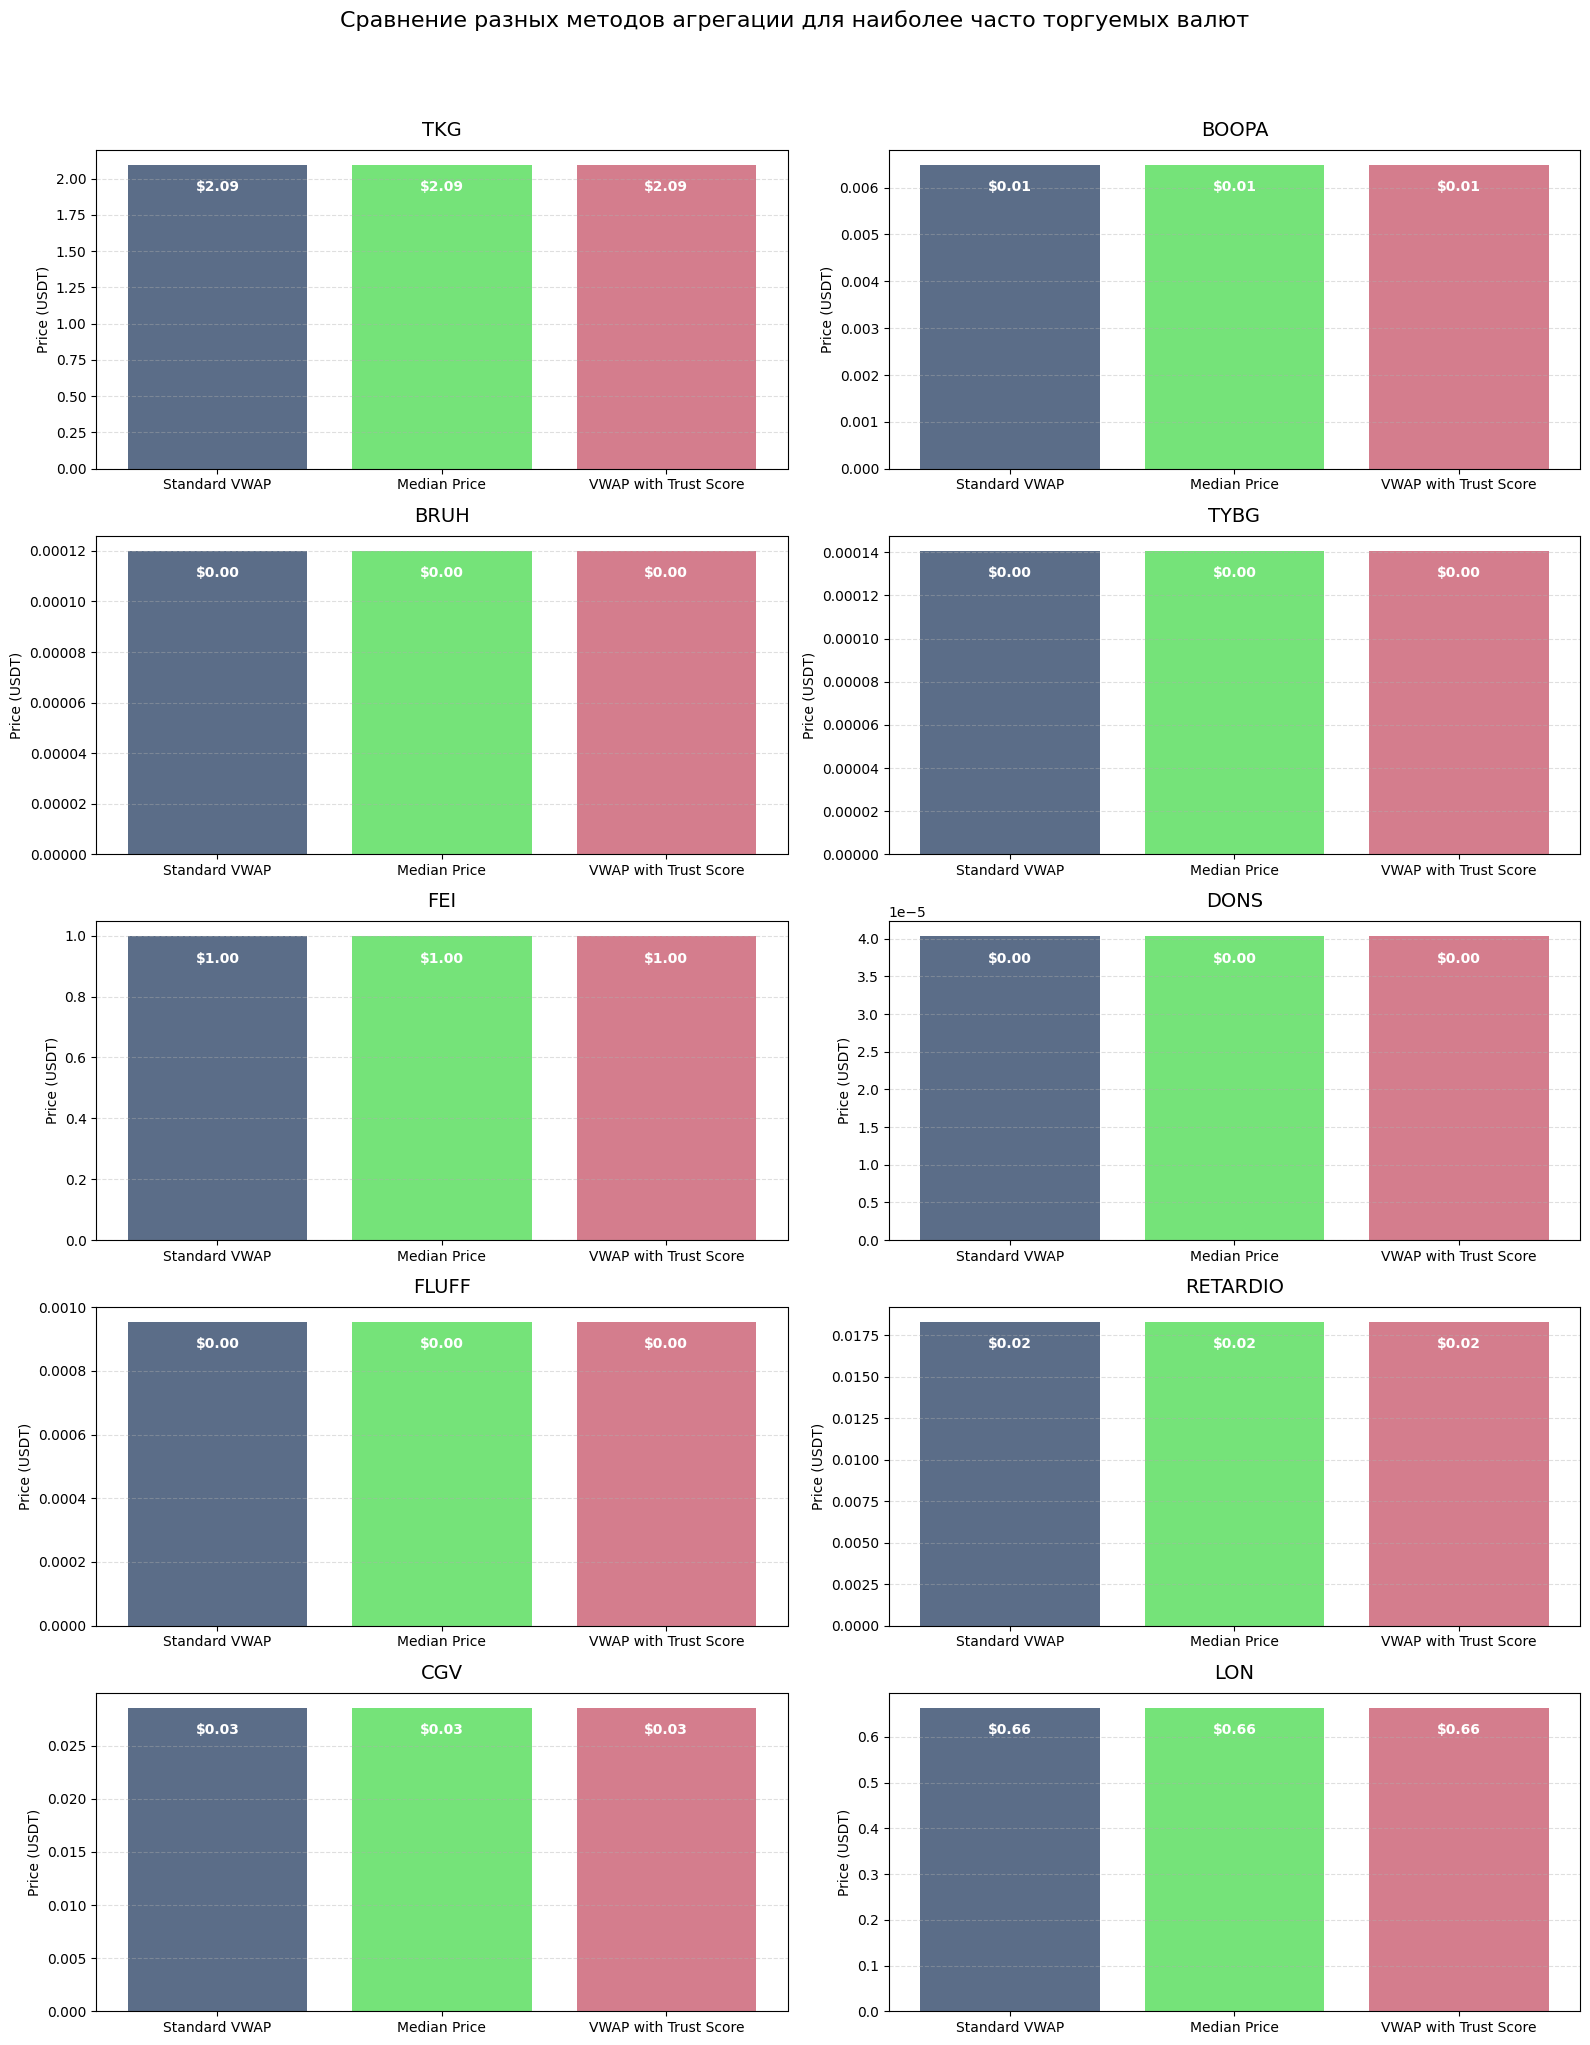

In [220]:
colors = ["#32486B", "#52DD57", "#CA5D71"]

fig, axes = plt.subplots(5, 2, figsize=(16, 20))
fig.suptitle('Сравнение разных методов агрегации для наиболее часто торгуемых валют', 
             fontsize=16, y=1.02)

for idx, currency in enumerate(least_important):
    ax = axes[idx//2, idx%2]
    
    median_price = median_prices.loc[median_prices['currency'] == currency, 'median_price_usdt']
    vwap_reliable = vwap_result.loc[vwap_result['currency'] == currency, 'reliable_vwap_usdt']
    vwap_regular = vwap_usdt.loc[vwap_usdt['base_code'] == currency, 'vwap']
    
    metrics = []
    values = []

    if not vwap_regular.empty:
        metrics.append('Standard VWAP')
        values.append(vwap_regular.values[0])
    
    if not median_price.empty:
        metrics.append('Median Price')
        values.append(median_price.values[0])
    
    if not vwap_reliable.empty:
        metrics.append('VWAP with Trust Score')
        values.append(vwap_reliable.values[0])
    
    
    bars = ax.bar(metrics, values, color=colors[:len(metrics)], alpha=0.8)
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height*0.95,
                f'${height:,.2f}',
                ha='center', va='top', color='white',
                fontweight='bold', fontsize=10)
    
    ax.set_title(currency, fontsize=14, pad=10)
    ax.set_ylabel('Price (USDT)', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.4)
    

plt.tight_layout()
plt.subplots_adjust(top=0.95) 
plt.show()

# Агрегирование через арбитражно-несовместную систему цен

In [ ]:
!pip install networkx

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\79636\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import networkx as nx

In [ ]:
top_10_currencies

['ETH', 'SOL', 'BTC', 'XRP', 'LTC', 'LINK', 'TRX', 'DOGE', 'ADA', 'BCH']

In [ ]:
top_10_currencies = ['XRP','LTC','ETH', 'SOL', 'BTC', 'USDT']

In [ ]:
top_10_currencies = ['ETH', 'SOL', 'LTC', 'XRP', 'LINK', 'BTC', 'TRX', 'BCH', 'DOGE', 'ADA', 'USDT']

In [ ]:
df_filtered = df_filtered[df_filtered['p'] > 0]
df_filtered.shape

(17540, 10)

In [ ]:
short_df = df_filtered[(df_filtered['quote_code'].isin(top_10_currencies)) & 
                      (df_filtered['base_code'].isin(top_10_currencies))]
short_df

,id_market,p,v,q,exchange_id,exchange,base_id,base_code,quote_id,quote_code
116,9442214,0.248187,782270.247706,194162.607310,429,Cryptomus,14.0,TRX,15.0,USDT
345,23378,0.000897,60.65404,0.054401,30,Gemini,5.0,LTC,1.0,BTC
398,71,0.047500,0,0.000000,1,XGo,5.0,LTC,2.0,ETH
412,366289,2.178000,10902.096492,23962.808088,27,Upbit,3.0,XRP,15.0,USDT
485,423278,0.000901,2080.152,1.875138,134,BitMart,5.0,LTC,1.0,BTC
...,...,...,...,...,...,...,...,...,...,...
22391,4268,1845.010000,155.327731,284211.609291,22,Kraken,2.0,ETH,15.0,USDT
22498,9443348,0.247010,24504.136111,6076.064921,431,Flipster,14.0,TRX,15.0,USDT
22547,5047,95948.000000,0.382194,36767.408438,26,Bitstamp,1.0,BTC,15.0,USDT
22585,9442206,364.520000,394.902997,144905.034439,429,Cryptomus,4.0,BCH,15.0,USDT


In [ ]:
min_volume = short_df['q'].quantile(0.1)
short_df = short_df[short_df['q'] >= min_volume]

df_agg_direct = short_df.groupby(['base_code', 'quote_code'])['p'].max().reset_index()
df_agg_indirect = short_df.groupby(['base_code', 'quote_code'])['p'].min().reset_index()

{('ADA', 'BTC'): Text(0.33037348853614423, -0.06475449177203285, '0.000'),
 ('ADA', 'ETH'): Text(0.29711082823755475, -0.03590872918783994, '0.000'),
 ('ADA', 'USDT'): Text(0.3962472487613884, 0.07870971684421924, '0.705'),
 ('BTC', 'USDT'): Text(-0.0847449627092296, 0.13654463458577926, '96362.130'),
 ('BTC', 'XRP'): Text(-0.14009088616538923, -0.3076971009349393, '43424.401'),
 ('BTC', 'ADA'): Text(0.330372284249304, -0.06475434698155924, '136986.301'),
 ('BTC', 'BCH'): Text(-0.01646877649435108, 0.05852431836337213, '264.061'),
 ('BTC', 'DOGE'): Text(-0.369071660095686, 0.49654702569294473, '548576.444'),
 ('BTC', 'ETH'): Text(-0.18388114849006998, 0.021918628618747604, '53.277'),
 ('BTC', 'LINK'): Text(0.05839642538204959, 0.09080433633080043, '6769.106'),
 ('BTC', 'LTC'): Text(-0.03365816106934183, 0.1056169268074505, '1114.951'),
 ('BTC', 'SOL'): Text(-0.026259815893367233, -0.09181548698112252, '657.376'),
 ('BTC', 'TRX'): Text(-0.2123903112432386, -0.47684901942265556, '392156.

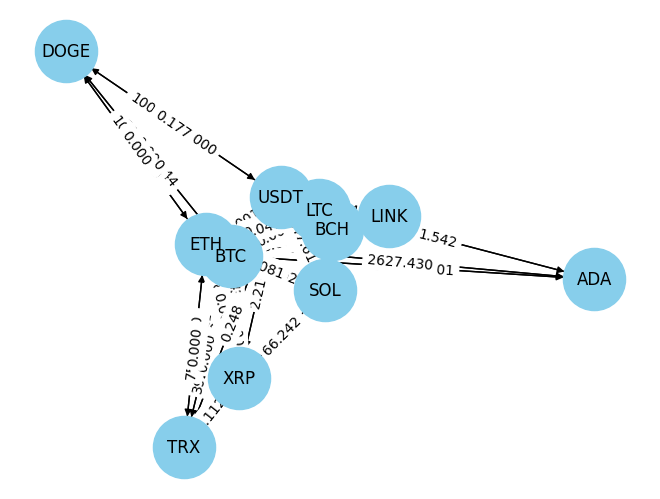

In [ ]:
G = nx.DiGraph()

# Добавляем рёбра с максимальными курсами
for _, row in df_agg_direct.iterrows():
    base = row['base_code']
    quote = row['quote_code']
    weight = row['p']
    G.add_edge(base, quote, weight=weight)

# Добавляем обратные рёбра (если нужно)
# Например, для USD → BTC: вес = 1 / min(BTC → USD)
for _, row in df_agg_indirect.iterrows():
    base, quote, weight = row['base_code'], row['quote_code'], row['p']
    if not G.has_edge(quote, base) and weight > 0:
        G.add_edge(quote, base, weight=1 / weight)
    if weight == 0:
        G.add_edge(quote, base, weight=0)


# Визуализация графа
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, arrows=True)
edge_labels = {(u, v): f"{d['weight']:.3f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

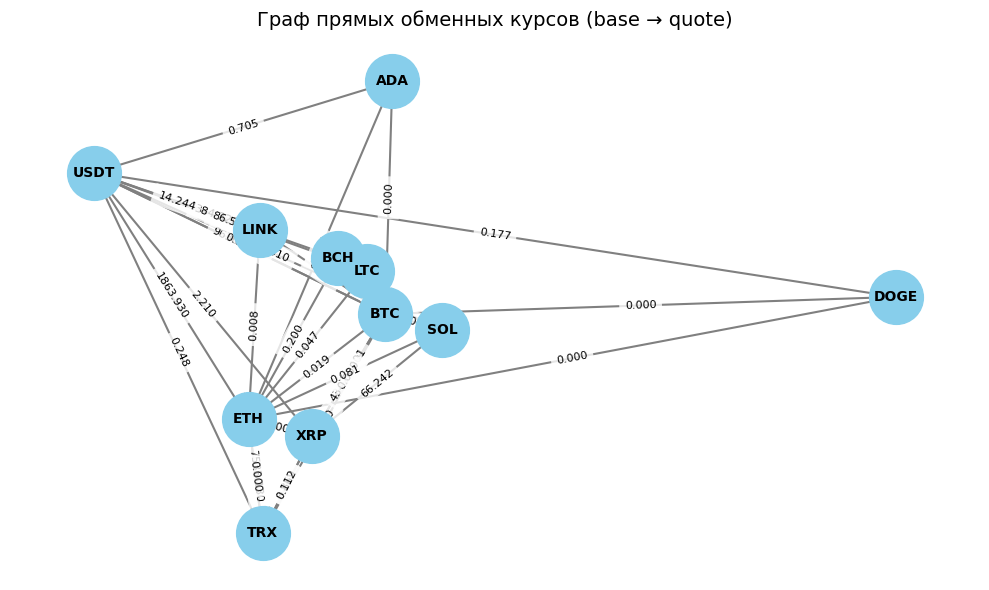

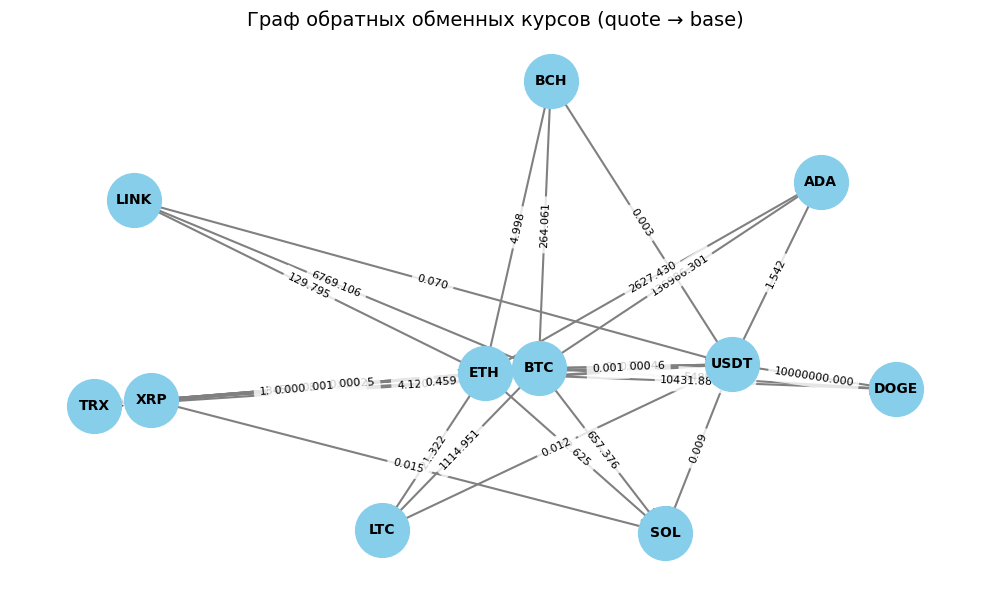

In [ ]:
# Создаём два графа
G_direct = nx.DiGraph()  # Граф для прямых рёбер
G_indirect = nx.DiGraph()  # Граф для обратных рёбер

# Добавляем рёбра в каждый граф
for _, row in df_agg_direct.iterrows():
    G_direct.add_edge(row['base_code'], row['quote_code'], weight=row['p'])

for _, row in df_agg_indirect.iterrows():
    base, quote, weight = row['base_code'], row['quote_code'], row['p']
    if weight > 0:
        G_indirect.add_edge(quote, base, weight=1 / weight)
    else:
        G_indirect.add_edge(quote, base, weight=0)

# Функция для рисования графа
def draw_graph(G, title):
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G, seed=42)  # Фиксируем позиции узлов
    
    # Рисуем узлы и рёбра
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1500)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    nx.draw_networkx_edges(
        G, pos,
        edge_color='gray',
        arrows=True,
        arrowstyle='->',
        arrowsize=20,
        width=1.5
    )
    
    # Подписи весов
    edge_labels = {(u, v): f"{d['weight']:.3f}" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels=edge_labels,
        font_size=8,
        label_pos=0.5,
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.8)
    )
    
    plt.title(title, fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Рисуем оба графа
draw_graph(G_direct, "Граф прямых обменных курсов (base → quote)")
draw_graph(G_indirect, "Граф обратных обменных курсов (quote → base)")

In [ ]:
for u, v, d in G.edges(data=True):
    if d['weight'] > 0:
        d['log_weight'] = np.log(d['weight'])
    else:
        d['log_weight'] = 0

{('ADA', 'BTC'): Text(-0.35220975640606966, -0.21998492347005105, '-11.82'),
 ('ADA', 'ETH'): Text(-0.3138540667593104, -0.22941202228466795, '-7.87'),
 ('ADA', 'USDT'): Text(-0.0008575357520227422, -0.47363110553826737, '-0.35'),
 ('BTC', 'USDT'): Text(0.2557018922867885, -0.10629575253932266, '11.48'),
 ('BTC', 'XRP'): Text(-0.258424872450983, 0.3736373756862912, '10.68'),
 ('BTC', 'ADA'): Text(-0.35221370691382137, -0.21999057976347003, '11.83'),
 ('BTC', 'BCH'): Text(0.19258093699601242, -0.07505619138815789, '5.58'),
 ('BTC', 'DOGE'): Text(0.34486177320407896, -0.15142322708747524, '13.22'),
 ('BTC', 'ETH'): Text(-0.05729388579356531, 0.13793092605371715, '3.98'),
 ('BTC', 'LINK'): Text(-0.12680285314367634, 0.016736903272692283, '8.82'),
 ('BTC', 'LTC'): Text(-0.009657615923504226, 0.010752684502944754, '7.02'),
 ('BTC', 'SOL'): Text(-0.03374993418208028, 0.10310328559237913, '6.49'),
 ('BTC', 'TRX'): Text(-0.3854348838198861, 0.5736664307306745, '12.88'),
 ('ETH', 'BTC'): Text(-

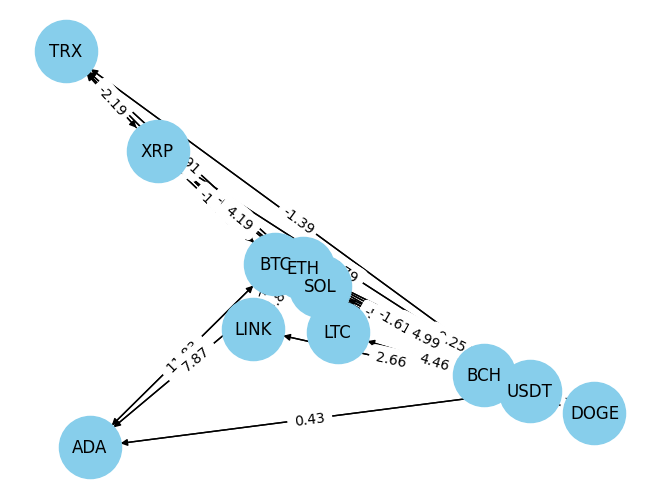

In [ ]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, arrows=True)
edge_labels = {(u, v): f"{d['log_weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

In [ ]:
largest_component = max(nx.weakly_connected_components(G), key=len)
# DG = G.subgraph(largest_component).copy()
# if nx.is_weakly_connected(DG):
#     print("Граф слабо связный")
# else:
#     print("Граф не слабо связный")
largest_component

{'ADA',
 'BCH',
 'BTC',
 'DOGE',
 'ETH',
 'LINK',
 'LTC',
 'SOL',
 'TRX',
 'USDT',
 'XRP'}

In [ ]:
# G = DG.copy()

In [ ]:
# Создаём матрицу логарифмов весов
nodes = sorted(G.nodes())
n = len(nodes)
log_matrix = pd.DataFrame(np.inf, index=nodes, columns=nodes)
np.fill_diagonal(log_matrix.values, 0)

# Проверка через алгоритм Флойда-Уоршелла
for k in nodes:
    for i in nodes:
        for j in nodes:
            if log_matrix.loc[i, j] > log_matrix.loc[i, k] + log_matrix.loc[k, j]:
                log_matrix.loc[i, j] = log_matrix.loc[i, k] + log_matrix.loc[k, j]

# Проверка диагонали (если log_matrix.loc[i, i] < 0 — арбитраж)
arbitrage_nodes = [node for node in nodes if log_matrix.loc[node, node] < 0]
print("Узлы с арбитражными циклами:", arbitrage_nodes)

Узлы с арбитражными циклами: []


In [ ]:
for node in arbitrage_nodes:
    print(f"Цикл для {node}: {log_matrix.loc[node, node]}")

In [ ]:
short_df

,id_market,p,v,q,exchange_id,exchange,base_id,base_code,quote_id,quote_code
116,9442214,0.248187,782270.247706,194162.607310,429,Cryptomus,14.0,TRX,15.0,USDT
345,23378,0.000897,60.65404,0.054401,30,Gemini,5.0,LTC,1.0,BTC
412,366289,2.178000,10902.096492,23962.808088,27,Upbit,3.0,XRP,15.0,USDT
485,423278,0.000901,2080.152,1.875138,134,BitMart,5.0,LTC,1.0,BTC
505,569598,2.190000,3381.449217,7405.373447,60,Latoken,3.0,XRP,15.0,USDT
...,...,...,...,...,...,...,...,...,...,...
22391,4268,1845.010000,155.327731,284211.609291,22,Kraken,2.0,ETH,15.0,USDT
22498,9443348,0.247010,24504.136111,6076.064921,431,Flipster,14.0,TRX,15.0,USDT
22547,5047,95948.000000,0.382194,36767.408438,26,Bitstamp,1.0,BTC,15.0,USDT
22585,9442206,364.520000,394.902997,144905.034439,429,Cryptomus,4.0,BCH,15.0,USDT


Подбор справедливых цен

In [ ]:
from scipy.optimize import linprog

In [ ]:
# Подготовка матрицы неравенств
edges = list(G.edges(data=True))
nodes = sorted(G.nodes())
node_index = {node: i for i, node in enumerate(nodes)}
n = len(nodes)

A = []
b = []
for u, v, d in edges:
    log_w = d['log_weight']
    # if not np.isfinite(log_w):
    #     continue  # Пропускаем inf/nan
    i = node_index[u]
    j = node_index[v]
    row = np.zeros(n)
    row[i] = 1
    row[j] = -1
    A.append(row)
    b.append(log_w)

# for i in range(n):
#     for j in range(n):
#         if i != j and not G.has_edge(nodes[i], nodes[j]):
#             # Исправлено: используем np.eye(n, k=i)[0] вместо np.eye(1, n, i)
#             row = np.eye(n, k=i)[0] - np.eye(n, k=j)[0]
#             A.append(row)
#             b.append(np.log(100))

assert all(len(row) == n for row in A), "Не все строки имеют длину n!"
A = np.array(A)
b = np.array(b)
result = linprog(c=np.zeros(n), A_ub=A, b_ub=b, bounds=(0, None))
assert np.all(np.isfinite(b)), "Найдены бесконечные или NaN значения в векторе b!"

A
if result.success:
    prices = {node: np.exp(x) for node, x in zip(nodes, result.x)}
    print("Внутренние цены:", prices)
else:
    print("Система несовместна. Возможные причины: арбитаж, несвязность графа")

Система несовместна. Возможные причины: арбитаж, несвязность графа


In [ ]:
# Предположим, что 'usdt' - это имя узла, соответствующего USDT
usdt_node = 'USDT'

# Добавляем ограничение, что цена USDT равна 1 (в логарифмической шкале это 0)
if usdt_node in node_index:
    usdt_idx = node_index[usdt_node]
    # Создаем строку для равенства (A_eq)
    eq_row = np.zeros(n)
    eq_row[usdt_idx] = 1
    # Преобразуем в двумерный массив для A_eq
    A_eq = [eq_row]
    b_eq = [0]  # log(1) = 0
    
    # Теперь используем linprog с ограничениями равенства
    result = linprog(c=np.zeros(n), A_ub=A, b_ub=b, A_eq=A_eq, b_eq=b_eq, bounds=(0, None))
else:
    # Если USDT нет в графе, решаем как раньше
    result = linprog(c=np.zeros(n), A_ub=A, b_ub=b, bounds=(0, None))

if result.success:
    prices = {node: np.exp(x) for node, x in zip(nodes, result.x)}
    print("Внутренние цены:", prices)

In [ ]:
from scipy.optimize import minimize

def objective(x):
    residuals = A.dot(x) - b  # A x ≤ b → residuals ≤ 0
    penalty = np.sum(np.maximum(residuals, 0)**2)  # Штраф за нарушение
    return penalty

result = minimize(objective, x0=np.ones(n), bounds=[(None, None)]*n)
prices = {node: np.exp(result.x[node_index[node]]) for node in nodes}
usdt_price = prices['USDT']
normalized_prices = {node: price / usdt_price for node, price in prices.items()}

print(normalized_prices)

{'ADA': np.float64(0.7039200503330958), 'BCH': np.float64(369.05443090484545), 'BTC': np.float64(96058.69069566067), 'DOGE': np.float64(0.17679895111766233), 'ETH': np.float64(1844.3486925292916), 'LINK': np.float64(14.242848197813768), 'LTC': np.float64(86.58571696792531), 'SOL': np.float64(146.38777579540408), 'TRX': np.float64(0.24854671862465283), 'USDT': np.float64(1.0), 'XRP': np.float64(2.209899109959131)}


IndexError: index 5 is out of bounds for axis 0 with size 5

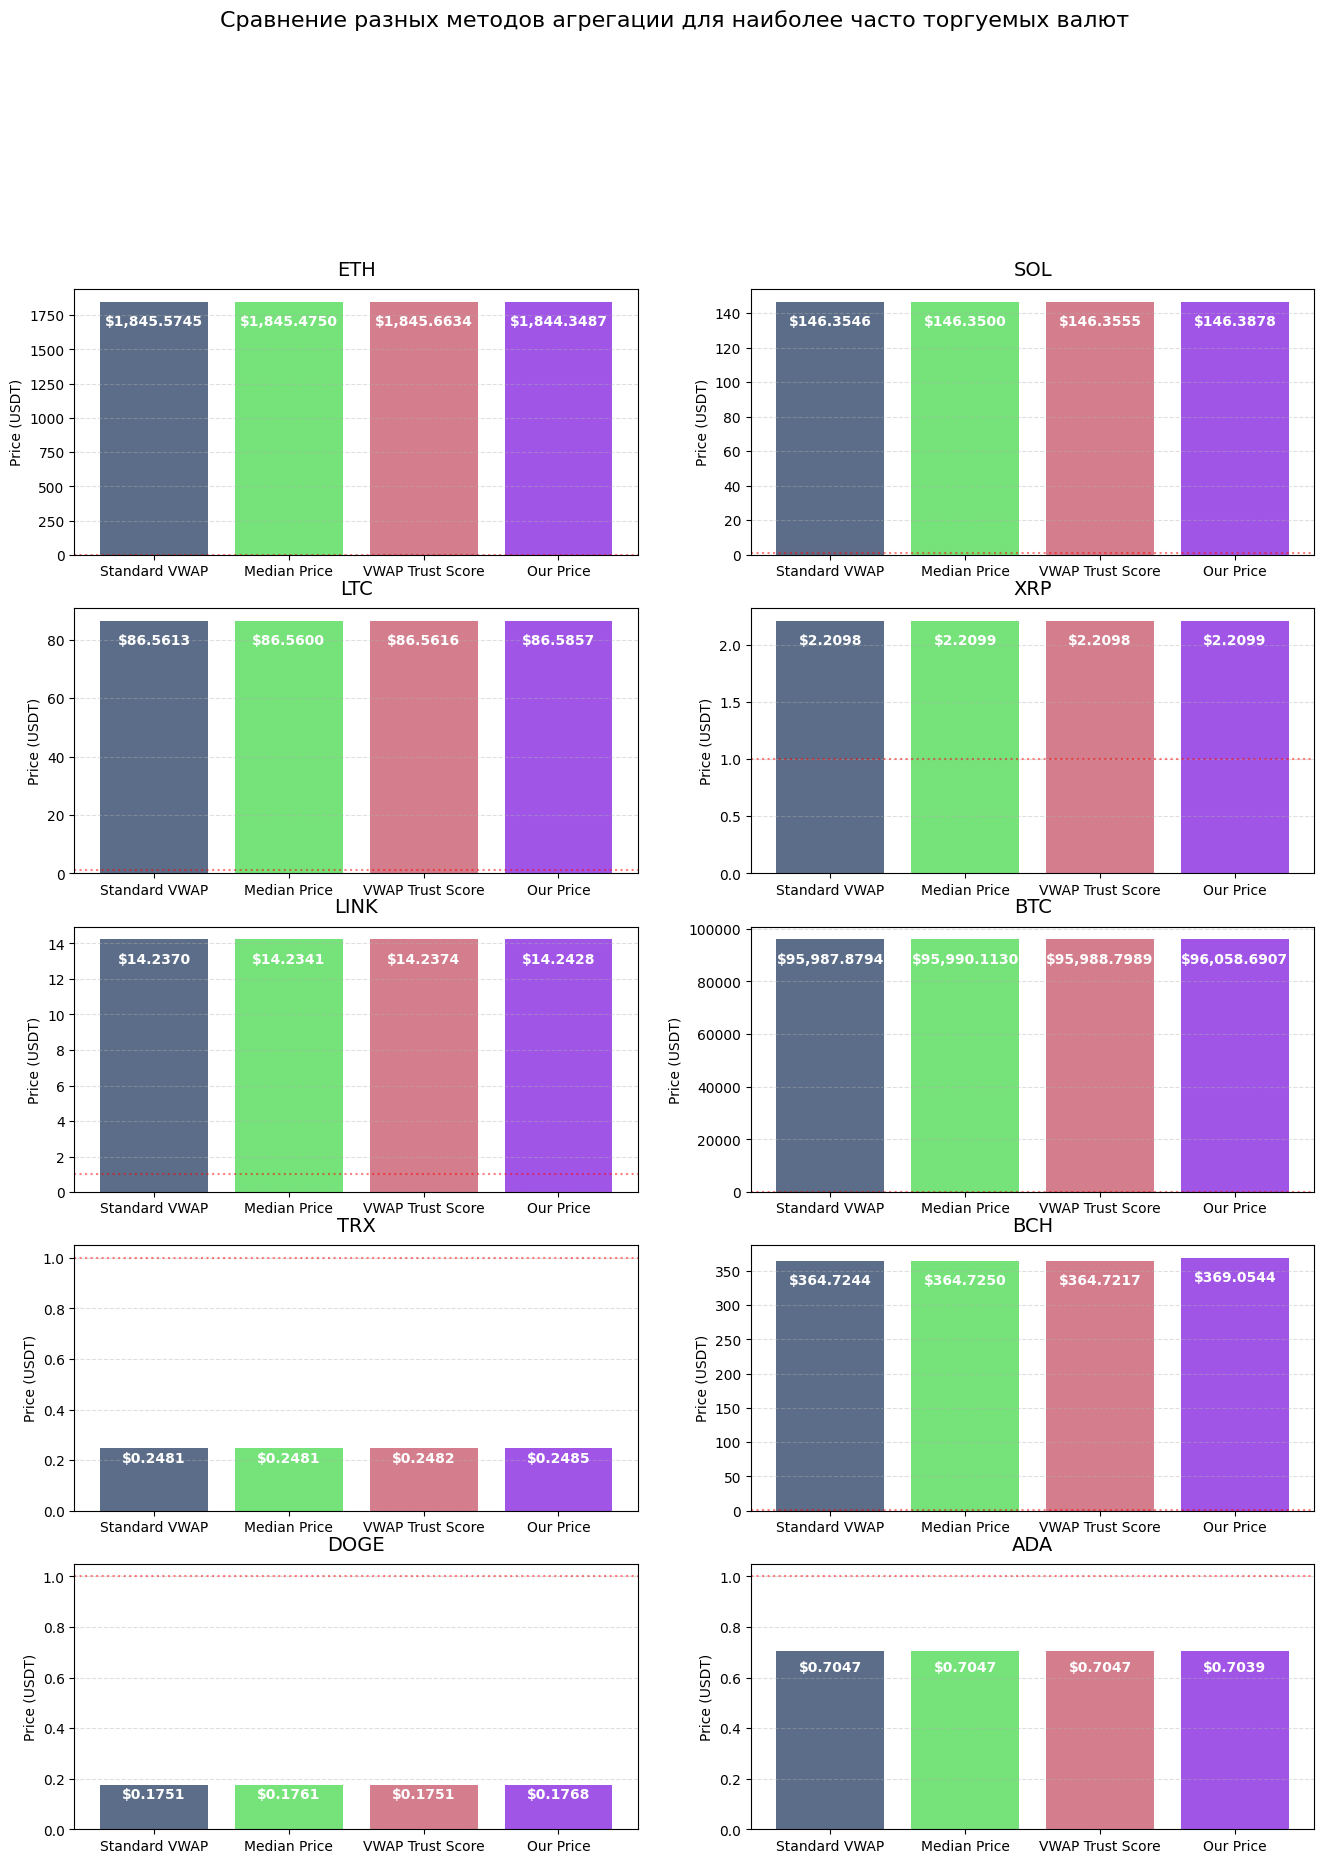

In [ ]:
colors = ["#32486B", "#52DD57", "#CA5D71", "#8A2BE2"]  # Добавил новый цвет для наших цен

fig, axes = plt.subplots(5, 2, figsize=(16, 20))
fig.suptitle('Сравнение разных методов агрегации для наиболее часто торгуемых валют', 
             fontsize=16, y=1.02)

for idx, currency in enumerate(top_10_currencies):
    ax = axes[idx//2, idx%2]
    
    median_price = median_prices.loc[median_prices['currency'] == currency, 'median_price_usdt']
    vwap_reliable = vwap_result.loc[vwap_result['currency'] == currency, 'reliable_vwap_usdt']
    vwap_regular = vwap_usdt.loc[vwap_usdt['base_code'] == currency, 'vwap']
    our_price = normalized_prices.get(currency, None)  # Получаем нашу цену из normalized_prices
    
    metrics = []
    values = []

    if not vwap_regular.empty:
        metrics.append('Standard VWAP')
        values.append(vwap_regular.values[0])
    
    if not median_price.empty:
        metrics.append('Median Price')
        values.append(median_price.values[0])
    
    if not vwap_reliable.empty:
        metrics.append('VWAP Trust Score')
        values.append(vwap_reliable.values[0])
    
    if our_price is not None:
        metrics.append('Our Price')
        values.append(our_price)
    
    # Выбираем цвета в зависимости от количества метрик
    bar_colors = colors[:len(metrics)]
    bars = ax.bar(metrics, values, color=bar_colors, alpha=0.8)
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height*0.95,
                f'${height:,.4f}',  # Изменил на 4 знака после запятой для более точного сравнения
                ha='center', va='top', color='white',
                fontweight='bold', fontsize=10)
    
    ax.set_title(currency, fontsize=14, pad=10)
    ax.set_ylabel('Price (USDT)', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.4)
    
    # Добавляем горизонтальную линию для USDT если это не сам USDT
    if currency != 'USDT':
        ax.axhline(1.0, color='red', linestyle=':', alpha=0.5)

plt.tight_layout()
plt.subplots_adjust(top=0.95) 
plt.show()